In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize to [0, 1]

# Build a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))  # Adjust epochs as needed

# Evaluate model accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

model.save('my_mnist_model.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



2024-12-08 14:14:18.168123: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/nadiajelani/Desktop/PYTHON/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8807 - loss: 0.4200 - val_accuracy: 0.9618 - val_loss: 0.1220
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9679 - loss: 0.1080 - val_accuracy: 0.9680 - val_loss: 0.1061
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0732 - val_accuracy: 0.9700 - val_loss: 0.0974
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0522 - val_accuracy: 0.9778 - val_loss: 0.0757
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9870 - loss: 0.0398 - val_accuracy: 0.9782 - val_loss: 0.0788
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0981


Model accuracy: 97.82%


# Segmentation

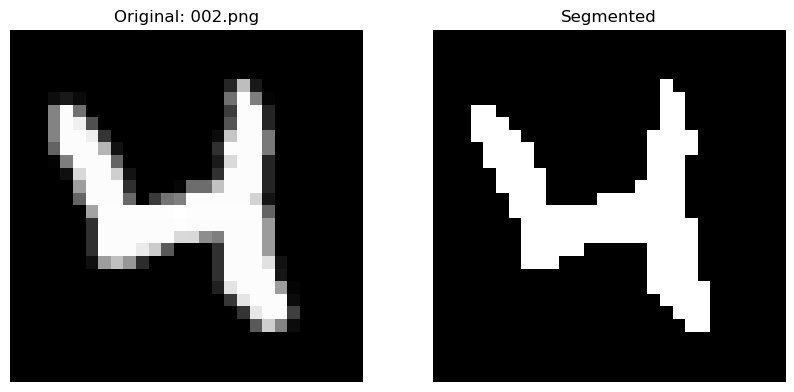

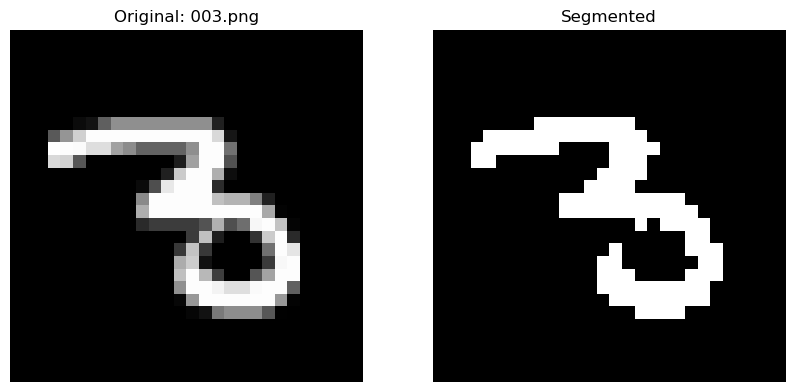

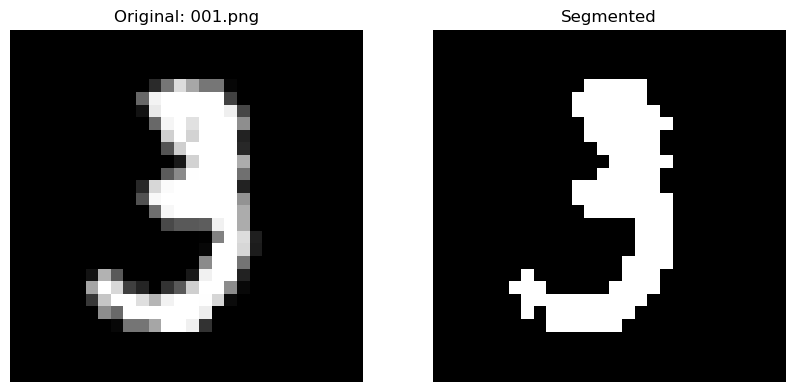

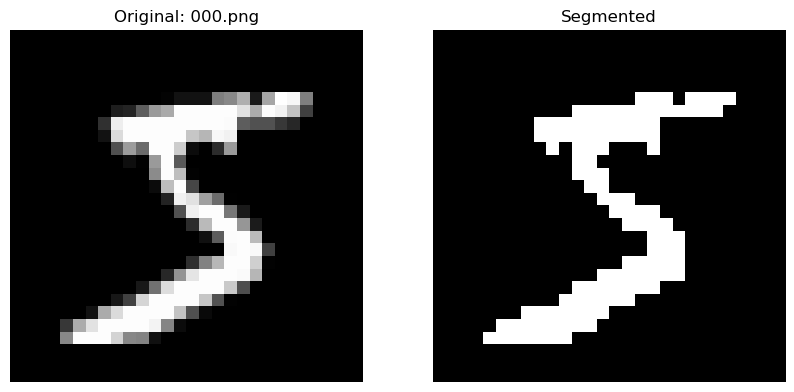

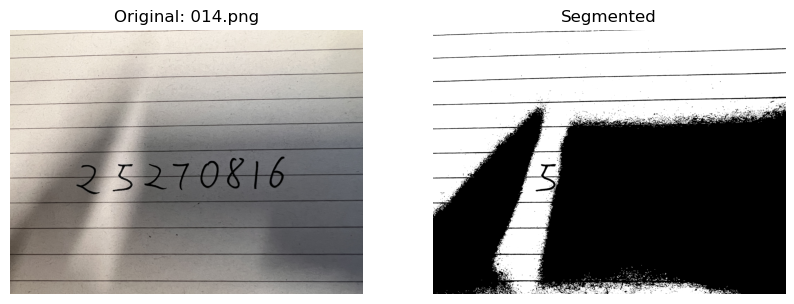

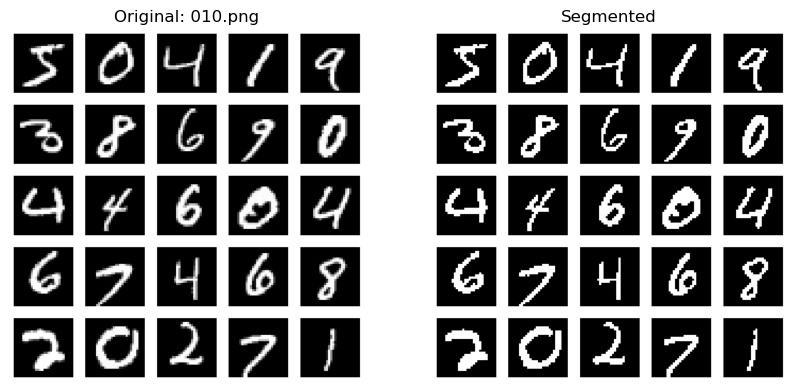

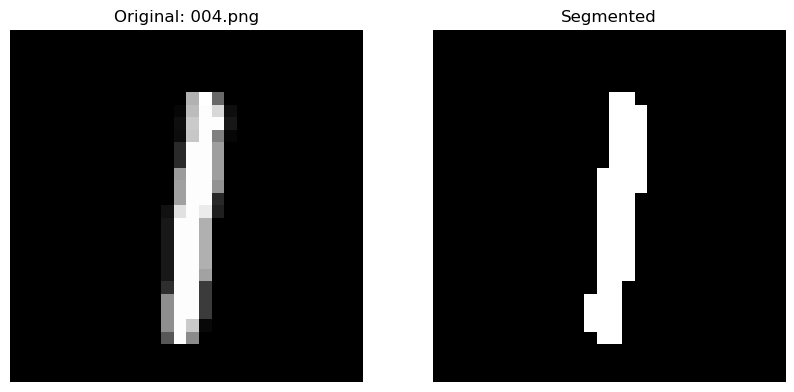

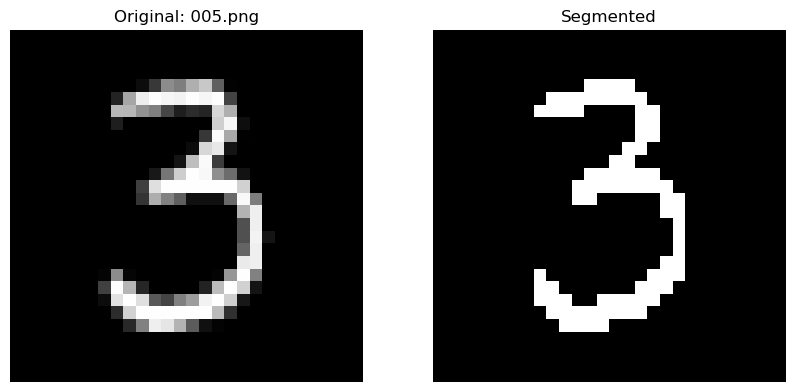

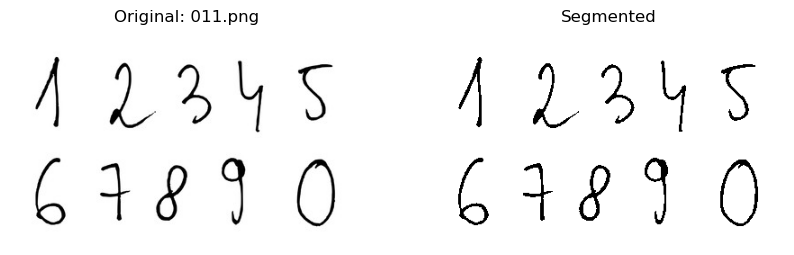

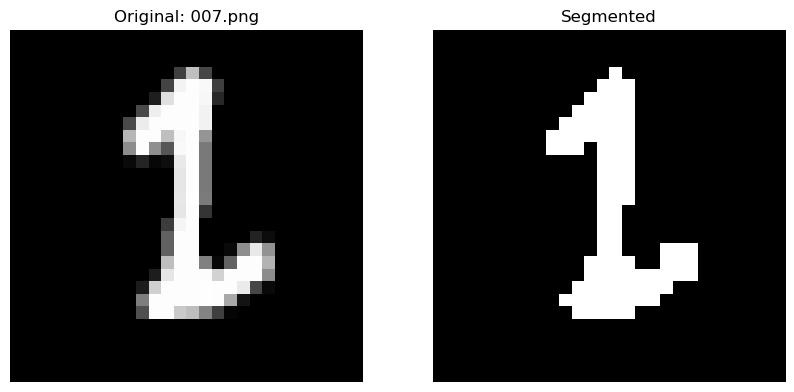

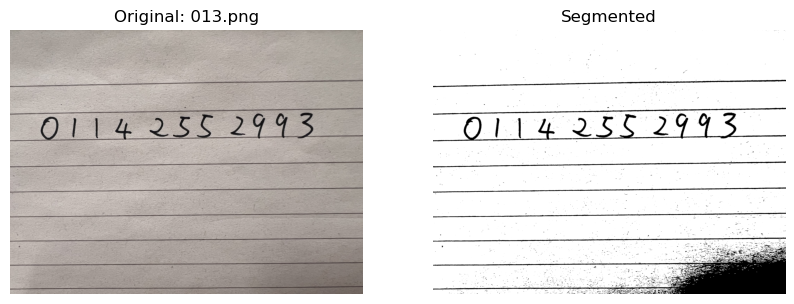

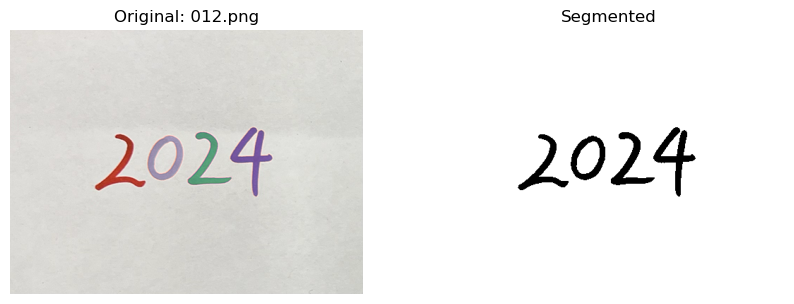

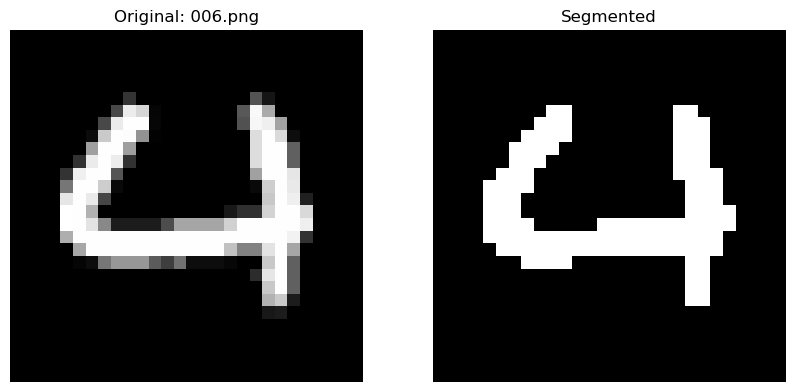

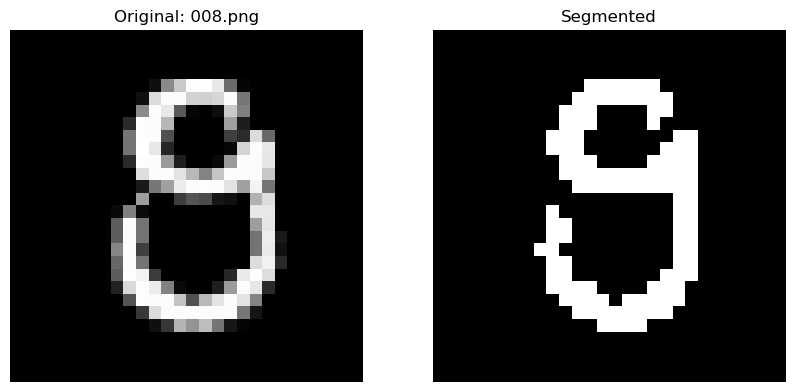

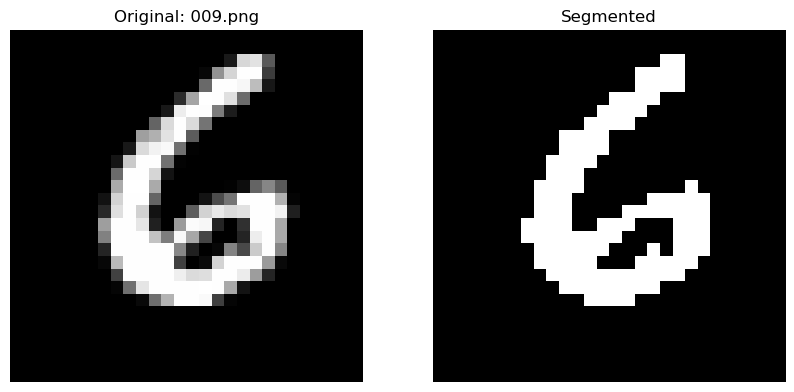

Original and segmented images displayed for all files.


In [3]:
import os
from skimage.io import imread, imsave
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.measure import find_contours  # Missing import added here

# Define the folder containing handwritten images
input_folder = './Number_Test_Data'  # Replace with your folder path
output_folder = 'segmented_images'    # Output folder for segmented images
os.makedirs(output_folder, exist_ok=True)

# Function to segment an image
def segment_image(image):
    if image.ndim == 3:  # Convert RGB or RGBA to grayscale
        image = rgb2gray(image[..., :3])
    binary_image = image > threshold_otsu(image)  # Binarize
    return remove_small_objects(binary_image, min_size=20)  # Clean noise


# Process and visualize all images in the folder
for filename in filter(lambda f: f.endswith(('.png', '.jpg', '.jpeg')), os.listdir(input_folder)):
    # Load and segment image
    image = imread(os.path.join(input_folder, filename))
    segmented_image = segment_image(image)

    # Save the segmented image
    imsave(os.path.join(output_folder, f"segmented_{filename}"), (segmented_image * 255).astype('uint8'))

    # Display original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Original: {filename}")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Segmented")
    plt.imshow(segmented_image, cmap='gray')
    plt.axis('off')
    plt.show()

print("Original and segmented images displayed for all files.")

# making predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
File: segmented_009.png, Predicted Digit: 6


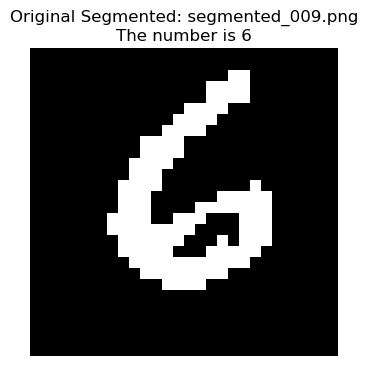

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
File: segmented_008.png, Predicted Digit: 3


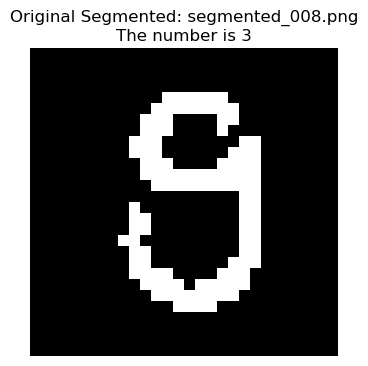

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
File: segmented_006.png, Predicted Digit: 4


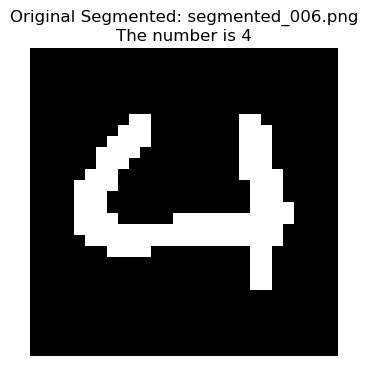

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
File: segmented_012.png, Predicted Digit: 5


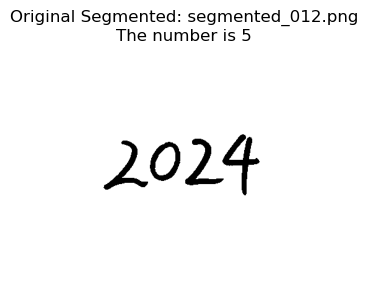

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
File: segmented_013.png, Predicted Digit: 5


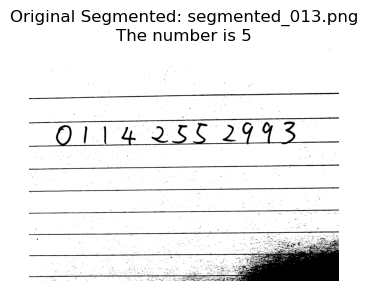

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
File: segmented_007.png, Predicted Digit: 1


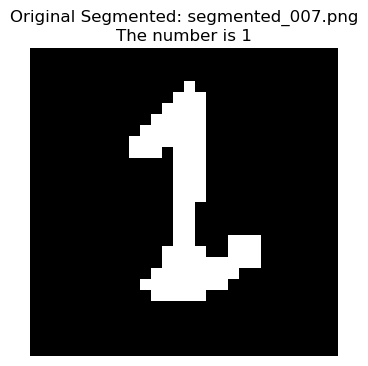

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
File: segmented_011.png, Predicted Digit: 5


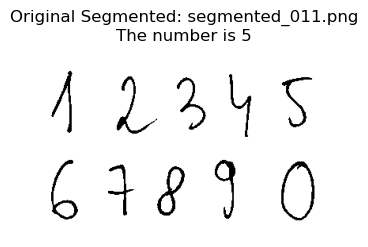

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
File: segmented_005.png, Predicted Digit: 3


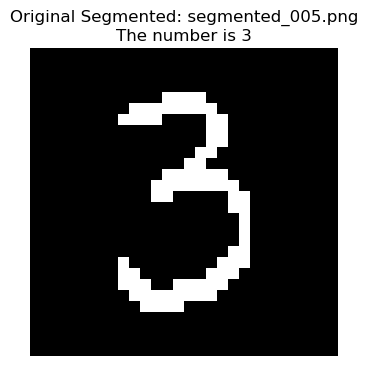

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
File: segmented_004.png, Predicted Digit: 1


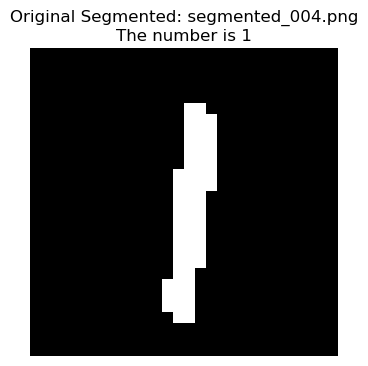

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
File: segmented_010.png, Predicted Digit: 5


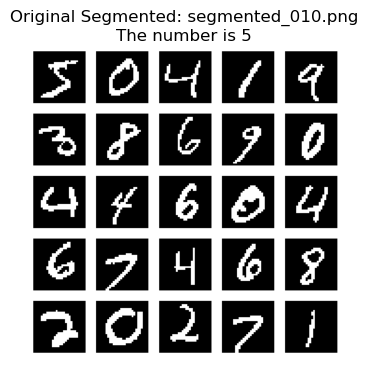

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
File: segmented_014.png, Predicted Digit: 7


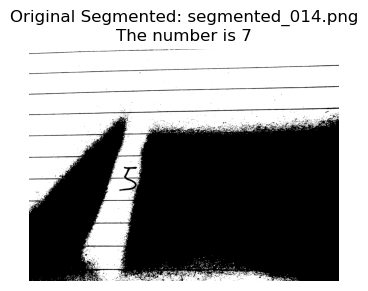

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
File: segmented_000.png, Predicted Digit: 5


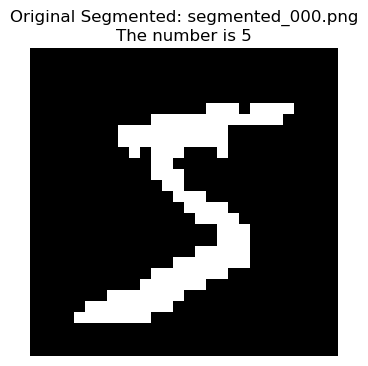

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
File: segmented_001.png, Predicted Digit: 3


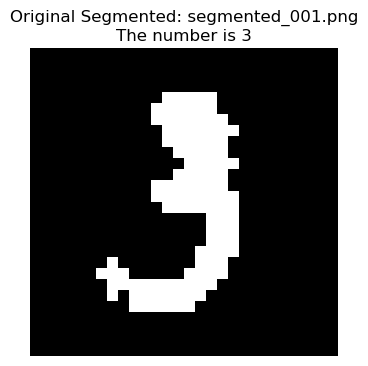

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
File: segmented_003.png, Predicted Digit: 3


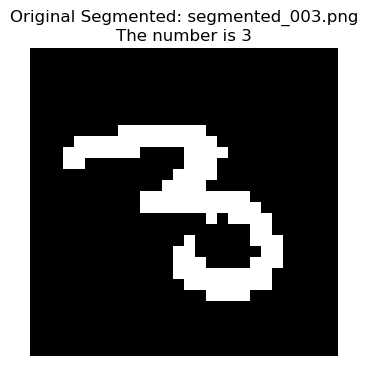

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
File: segmented_002.png, Predicted Digit: 4


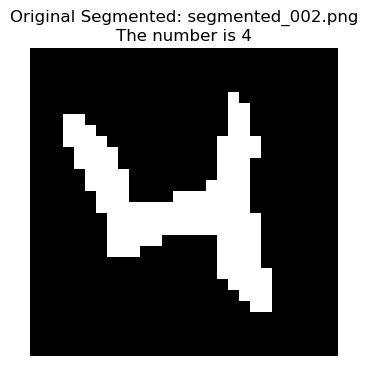

In [3]:
from skimage.transform import resize

# Load the pre-trained MNIST model
model = tf.keras.models.load_model('my_mnist_model.h5')

# Iterate through segmented images and make predictions
for filename in os.listdir(output_folder):
    if filename.startswith('segmented_') and filename.endswith(('.png', '.jpg', '.jpeg')):
        # Load the segmented image
        segmented_path = os.path.join(output_folder, filename)
        segmented_image = imread(segmented_path) > 0  # Load binary segmented image and ensure it's binary

        # Resize the image to 28x28 (MNIST model input size)
        resized_image = resize(segmented_image.astype('float32'), (28, 28), anti_aliasing=True)
        resized_image_expanded = tf.expand_dims(resized_image, axis=-1)  # Add channel dimension
        resized_image_expanded = tf.expand_dims(resized_image_expanded, axis=0)   # Add batch dimension

        # Predict the digit
        prediction = model.predict(resized_image_expanded)
        predicted_digit = prediction.argmax()

        # Print the prediction to the console
        print(f"File: {filename}, Predicted Digit: {predicted_digit}")

        # Display the original segmented image
        plt.figure(figsize=(4, 4))
        plt.title(f"Original Segmented: {filename}\nThe number is {predicted_digit}")
        plt.imshow(segmented_image, cmap='gray')
        plt.axis('off')
        plt.show()  # Show each image immediately after the prediction is printed

# Image 10(load image)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output paths
input_image_path = "segmented_010.png"
output_folder = "extracted_digits"
os.makedirs(output_folder, exist_ok=True)

# Step 1: Load the image
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Apply thresholding
# Use adaptive thresholding to handle variations in digit intensity
binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Step 3: Find contours
# Find external contours only (to exclude inner parts if digits are hollow)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a minimum contour area to filter out small noise
min_contour_area = 50

def show_image(title, img, cmap=None):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis("off")
    plt.show()


# bounding box & annotate

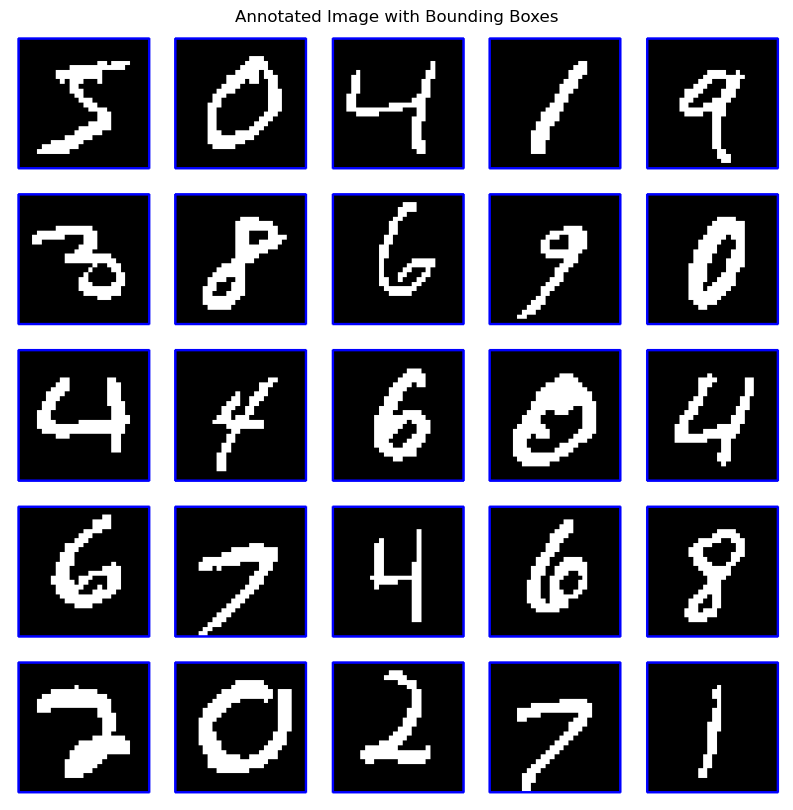

In [5]:
# Draw bounding boxes
def draw_bounding_boxes(image, contours, min_contour_area):
    # Convert grayscale image to RGB for visualization
    visualized_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    for contour in contours:
        # Filter out small contours
        if cv2.contourArea(contour) < min_contour_area:
            continue

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Draw the bounding box on the visualized image
        cv2.rectangle(visualized_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle

    return visualized_image

# Generate bounding boxes image
annotated_image = draw_bounding_boxes(image, contours, min_contour_area)

# Save and display the annotated image with bounding boxes
annotated_image_path = os.path.join(output_folder, "annotated_image.png")
cv2.imwrite(annotated_image_path, annotated_image)

plt.figure(figsize=(10, 10))
plt.title("Annotated Image with Bounding Boxes")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# contour & extract digits

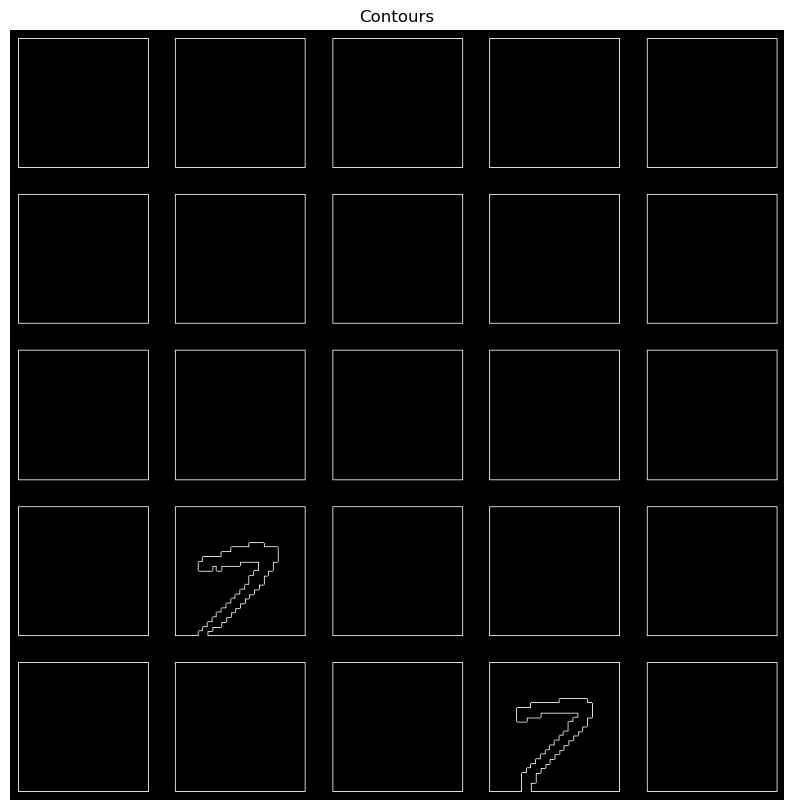

Digit 0 saved to extracted_digits/digit_0.png


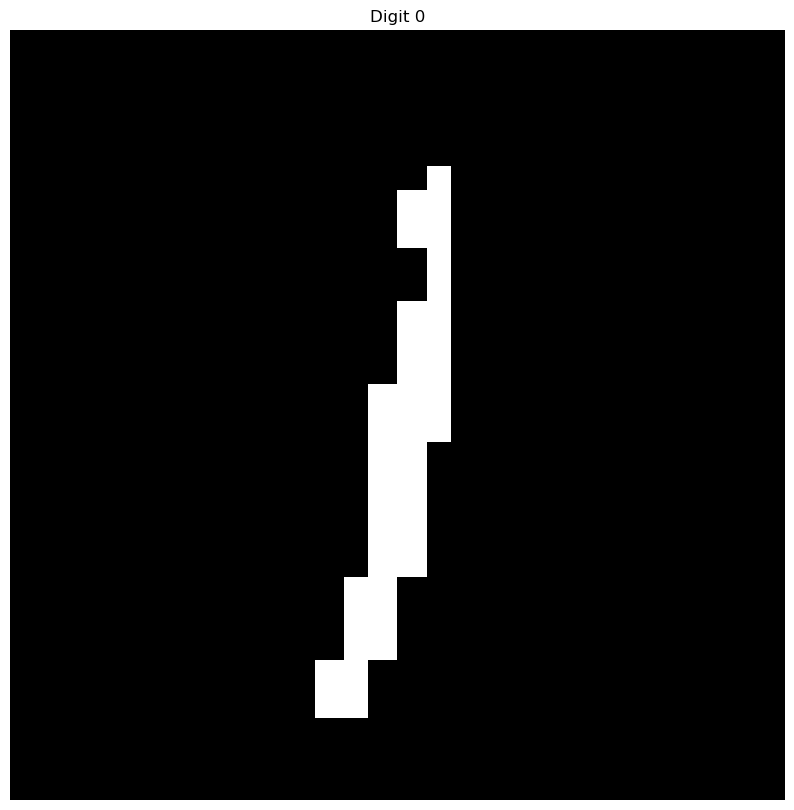

Digit 1 saved to extracted_digits/digit_1.png


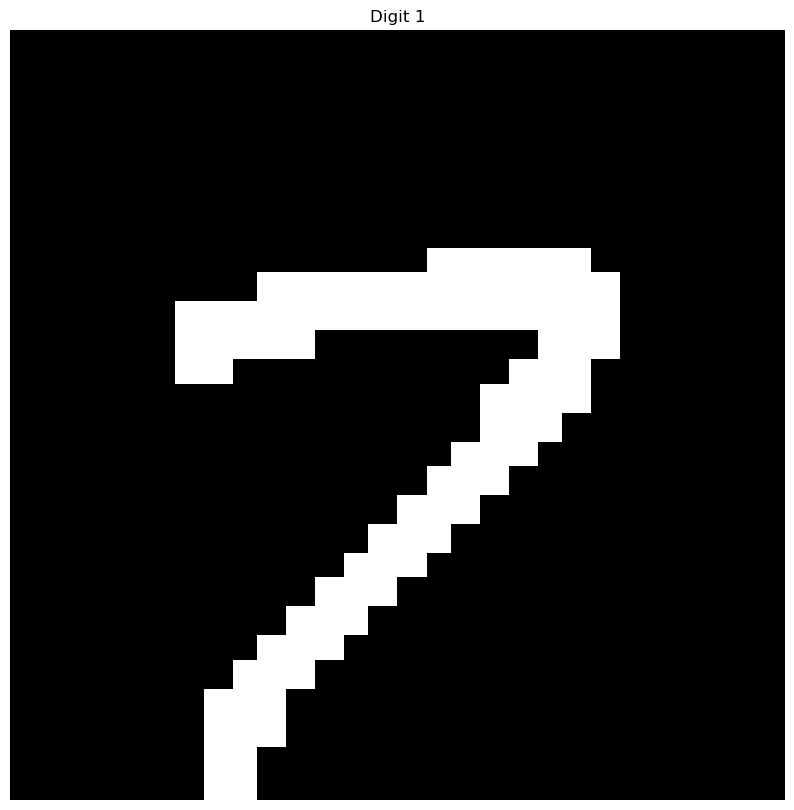

Digit 2 saved to extracted_digits/digit_2.png


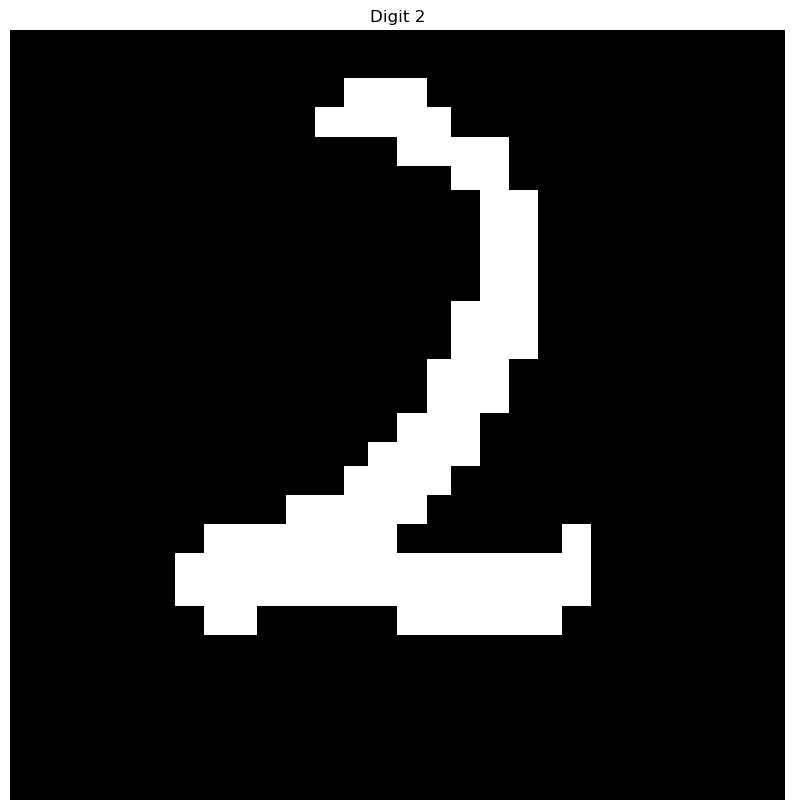

Digit 3 saved to extracted_digits/digit_3.png


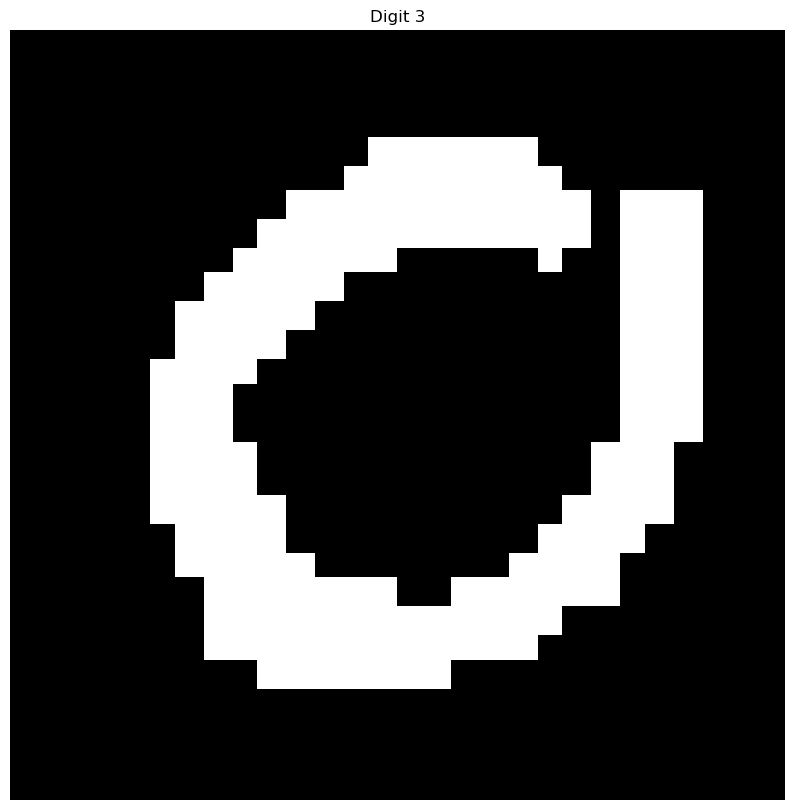

Digit 4 saved to extracted_digits/digit_4.png


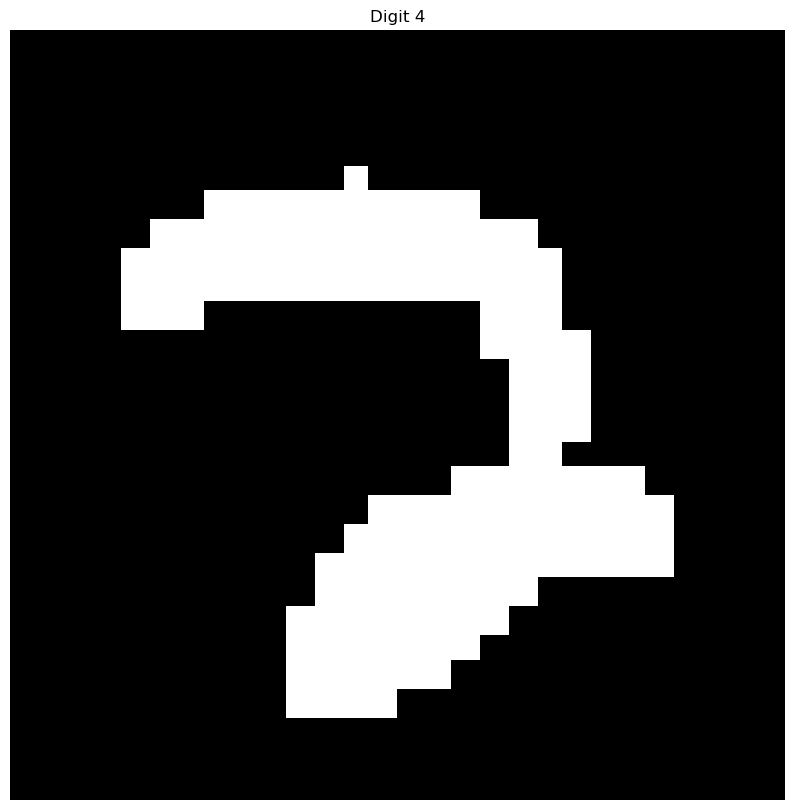

Digit 5 saved to extracted_digits/digit_5.png


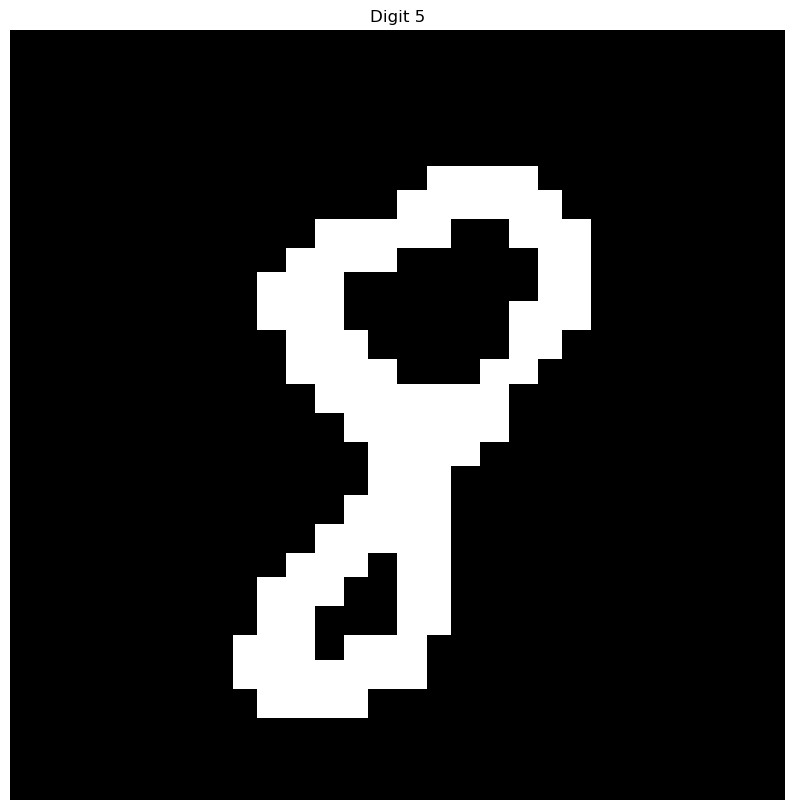

Digit 6 saved to extracted_digits/digit_6.png


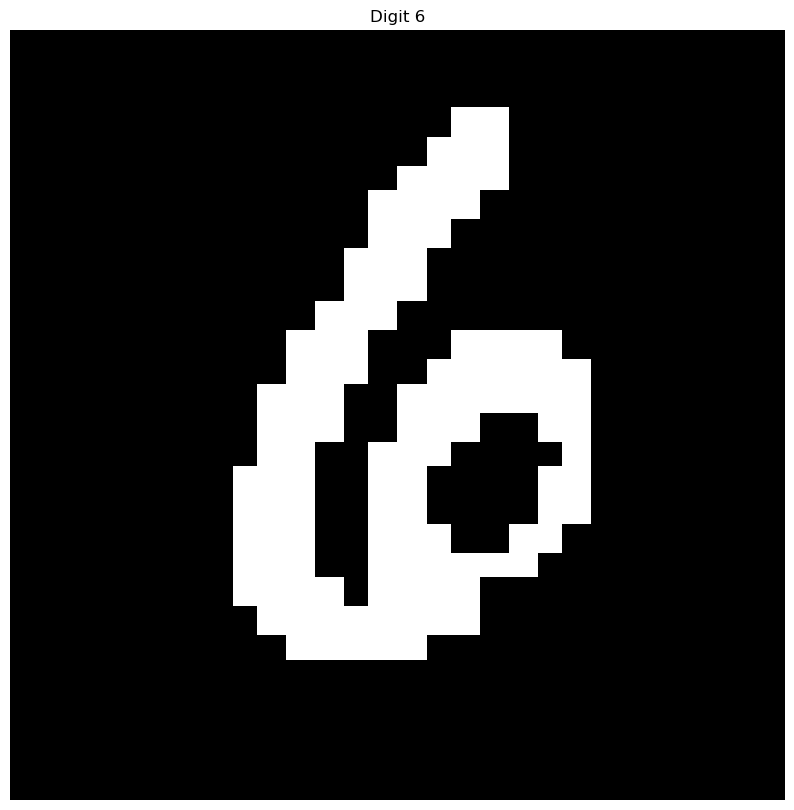

Digit 7 saved to extracted_digits/digit_7.png


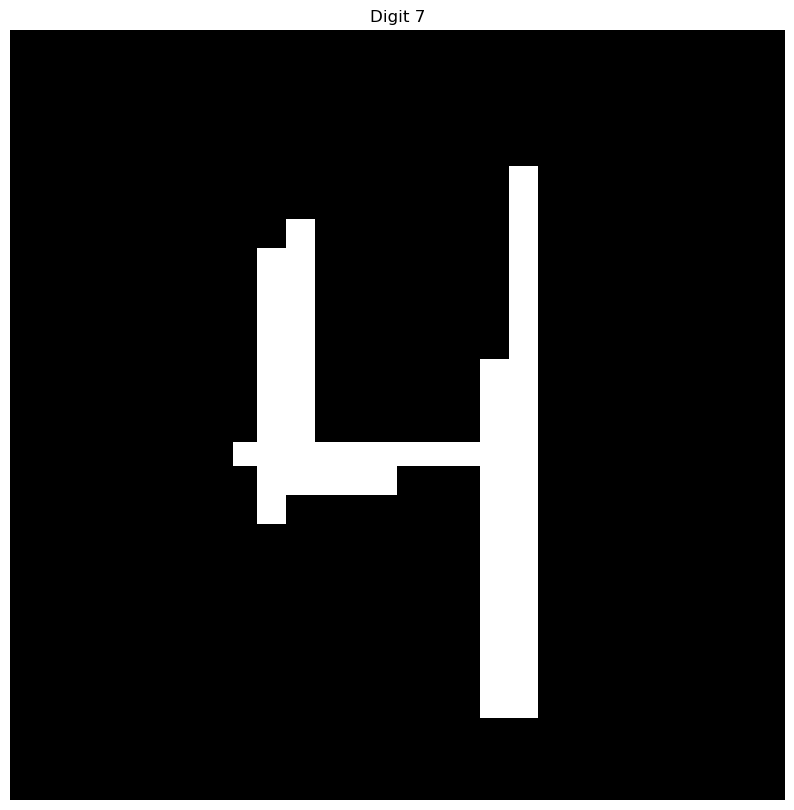

Digit 8 saved to extracted_digits/digit_8.png


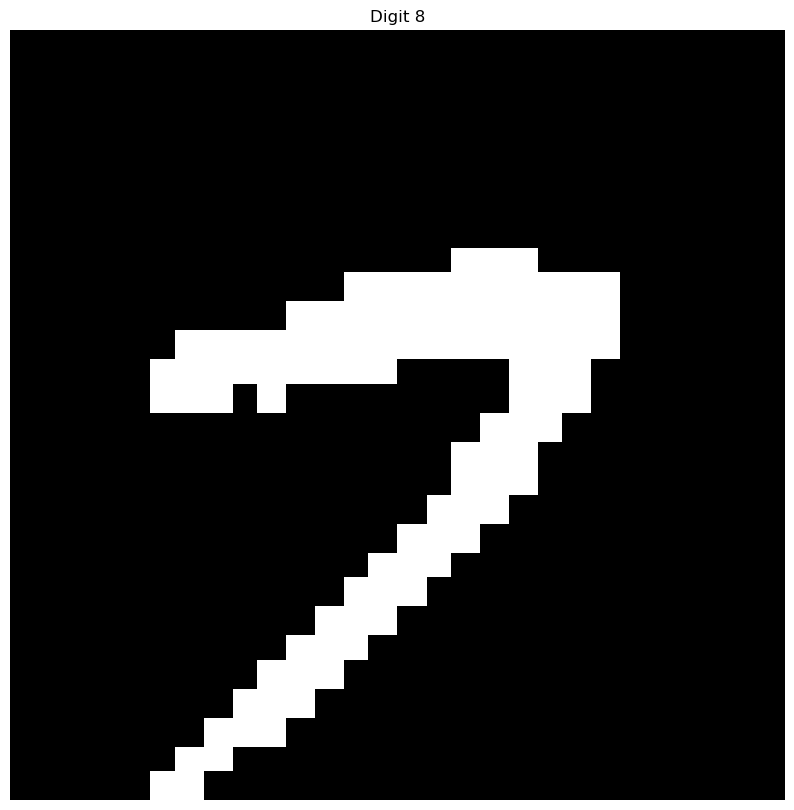

Digit 9 saved to extracted_digits/digit_9.png


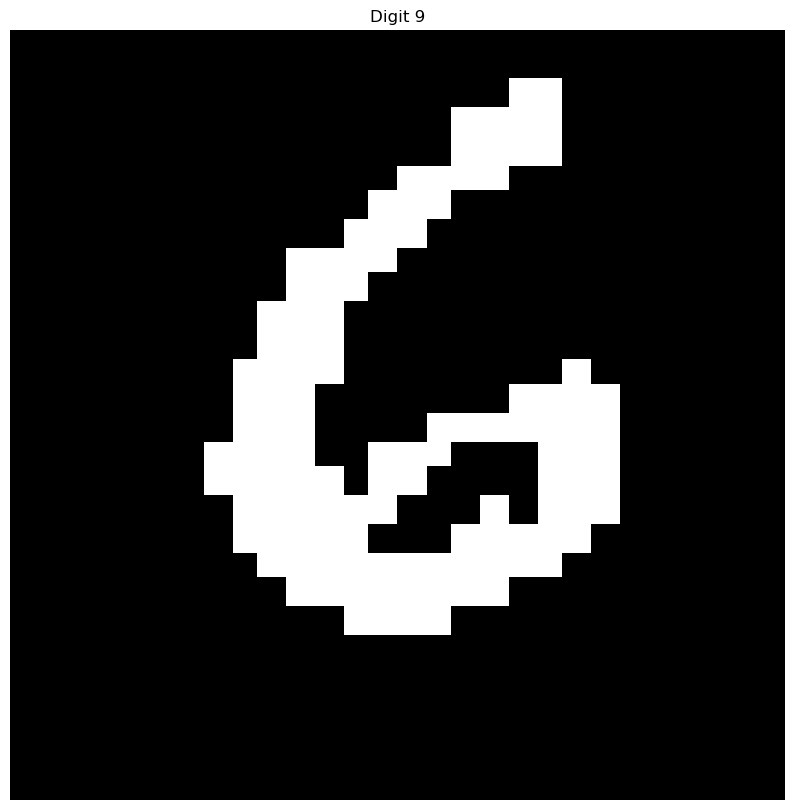

Digit 10 saved to extracted_digits/digit_10.png


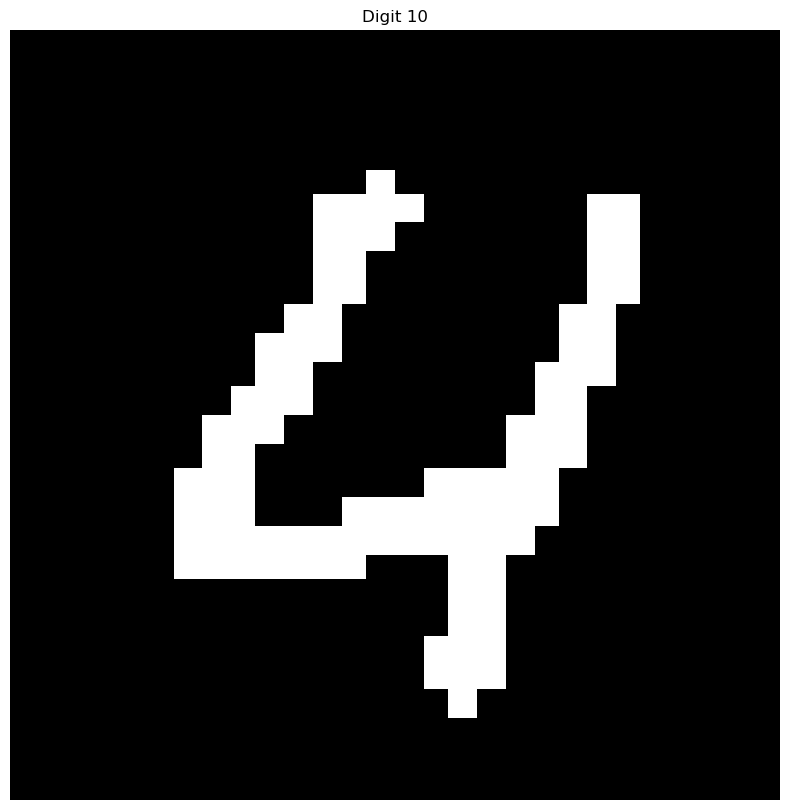

Digit 11 saved to extracted_digits/digit_11.png


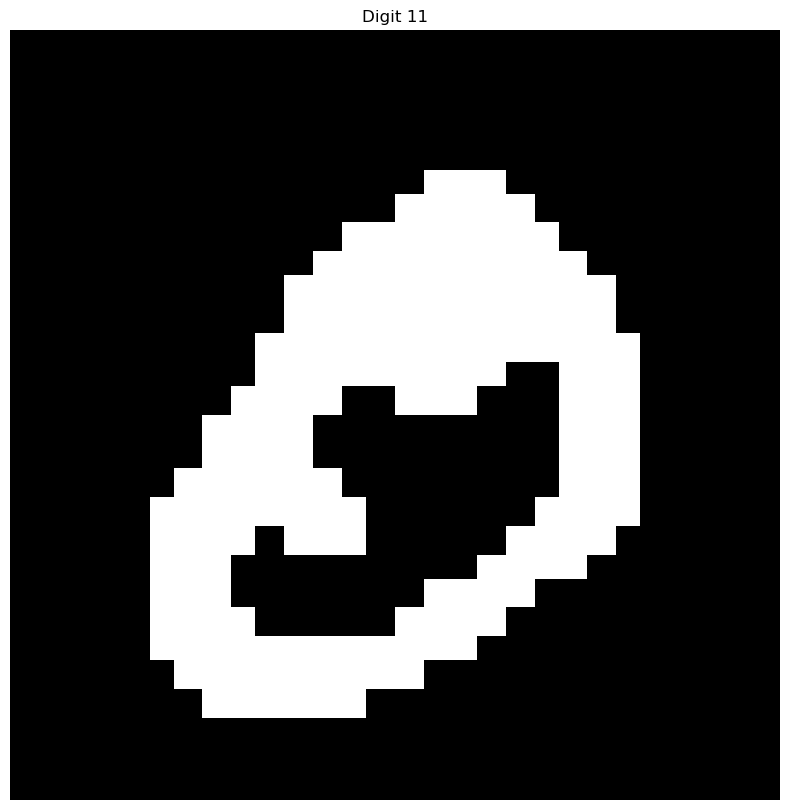

Digit 12 saved to extracted_digits/digit_12.png


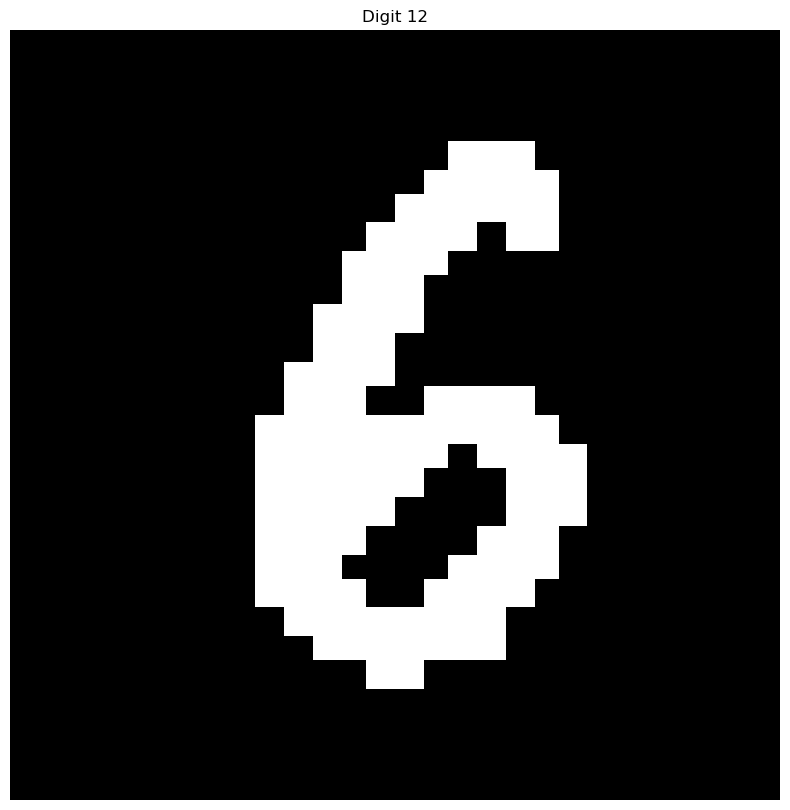

Digit 13 saved to extracted_digits/digit_13.png


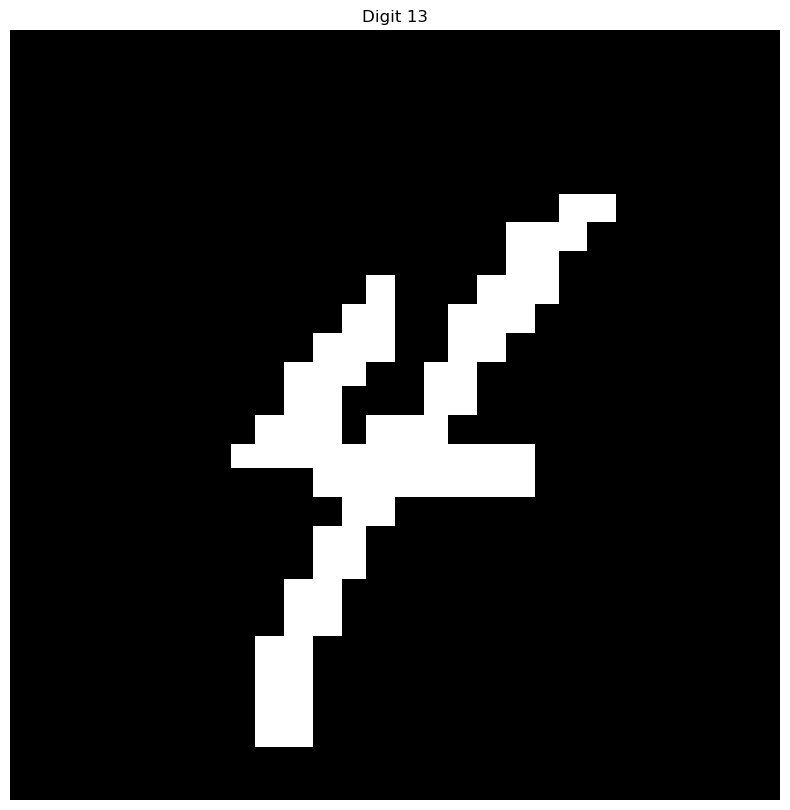

Digit 14 saved to extracted_digits/digit_14.png


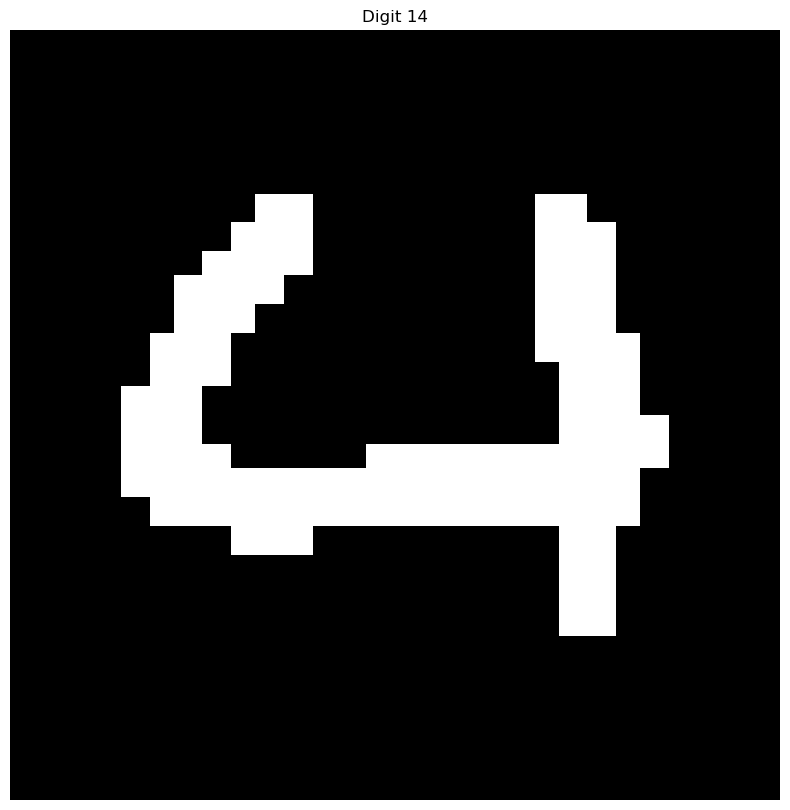

Digit 15 saved to extracted_digits/digit_15.png


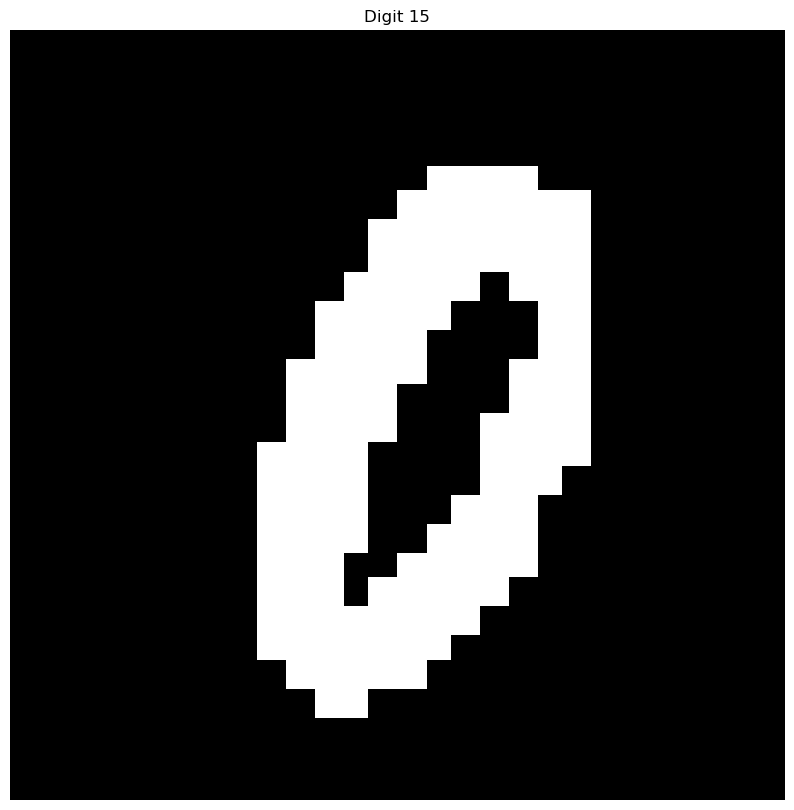

Digit 16 saved to extracted_digits/digit_16.png


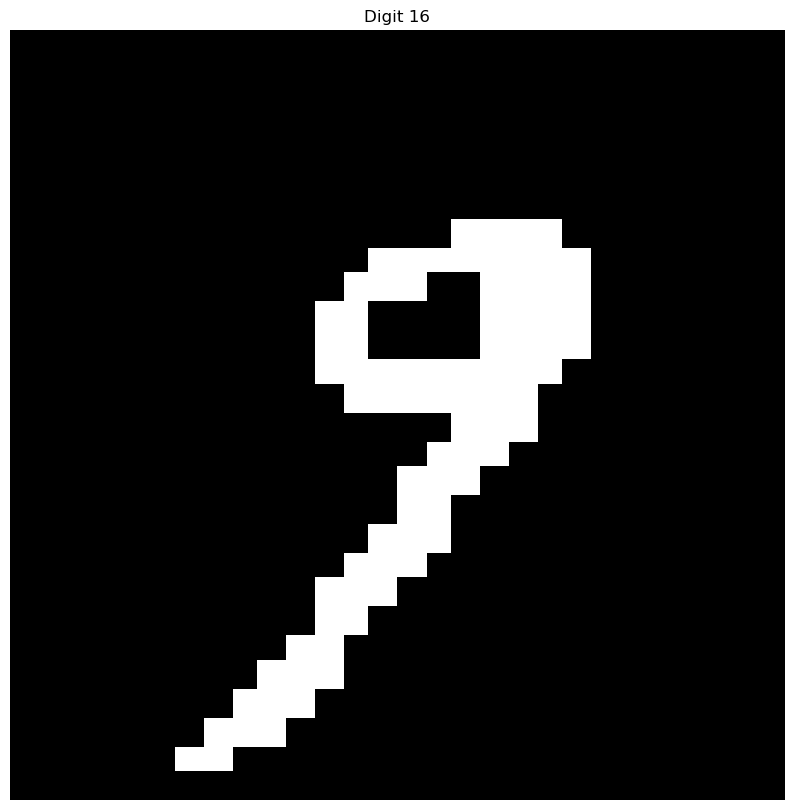

Digit 17 saved to extracted_digits/digit_17.png


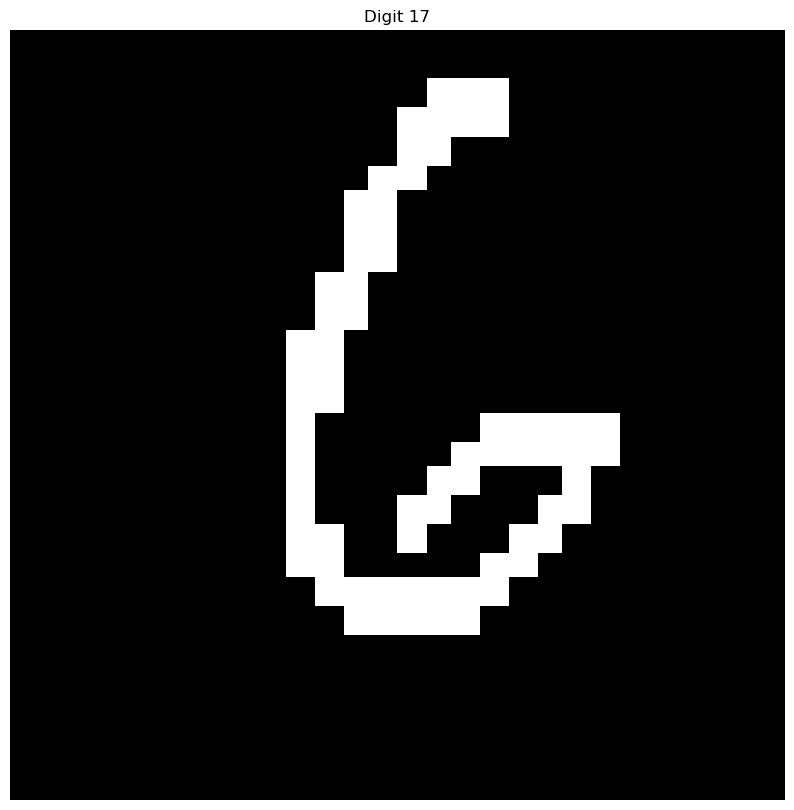

Digit 18 saved to extracted_digits/digit_18.png


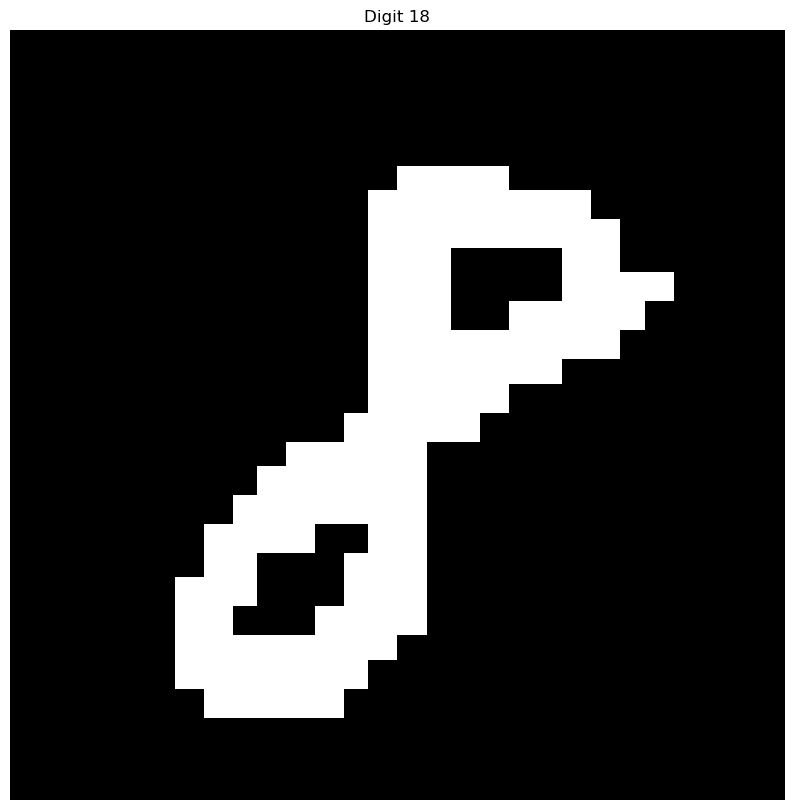

Digit 19 saved to extracted_digits/digit_19.png


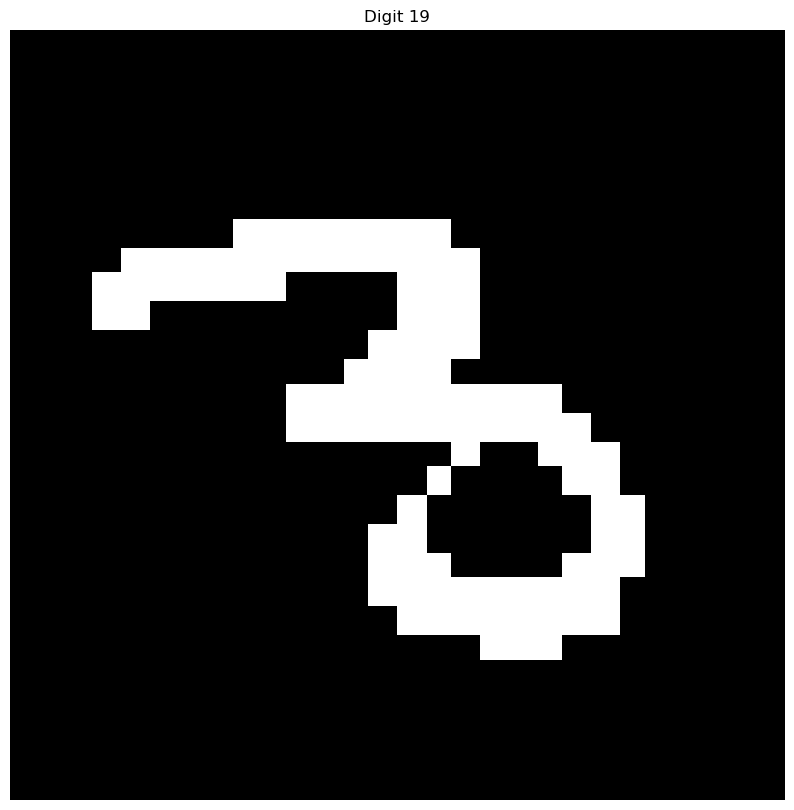

Digit 20 saved to extracted_digits/digit_20.png


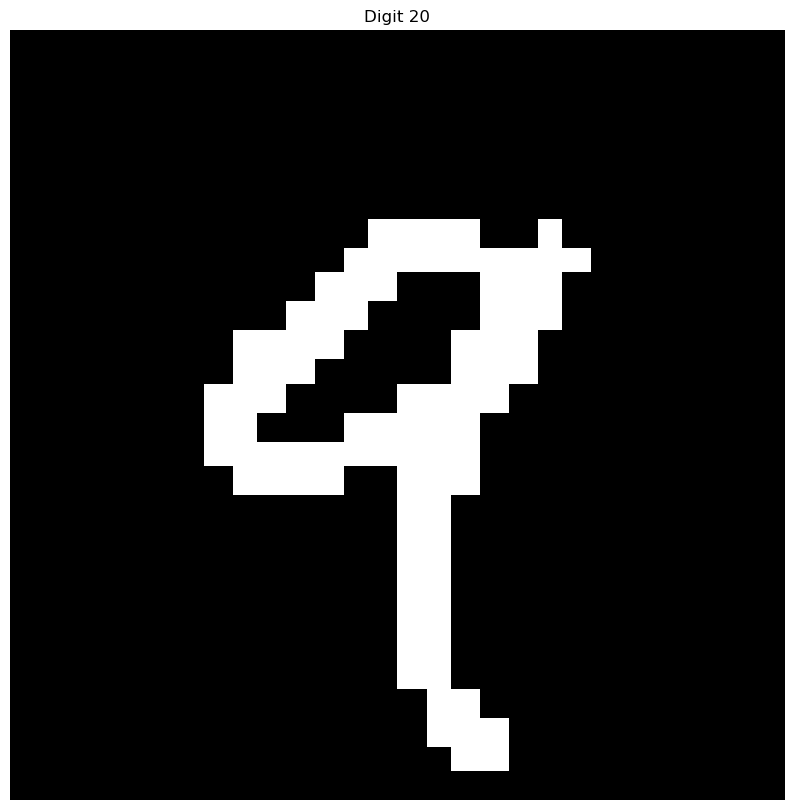

Digit 21 saved to extracted_digits/digit_21.png


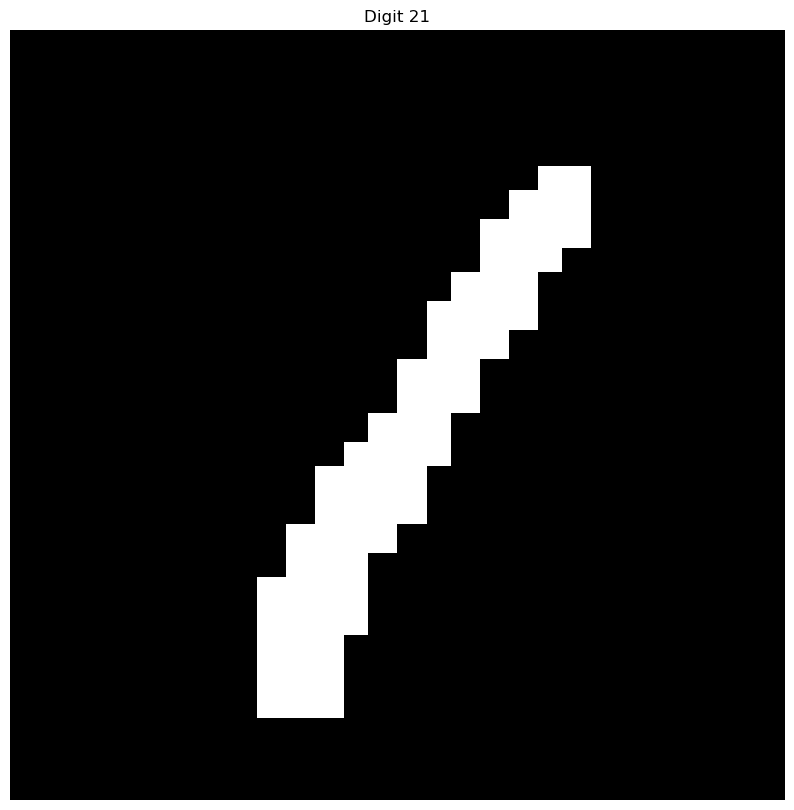

Digit 22 saved to extracted_digits/digit_22.png


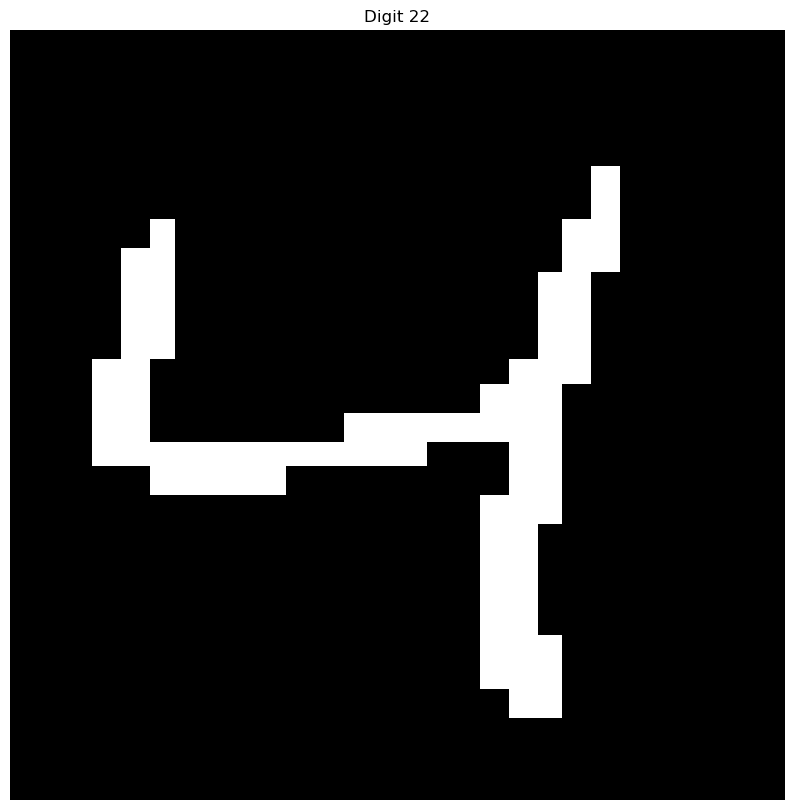

Digit 23 saved to extracted_digits/digit_23.png


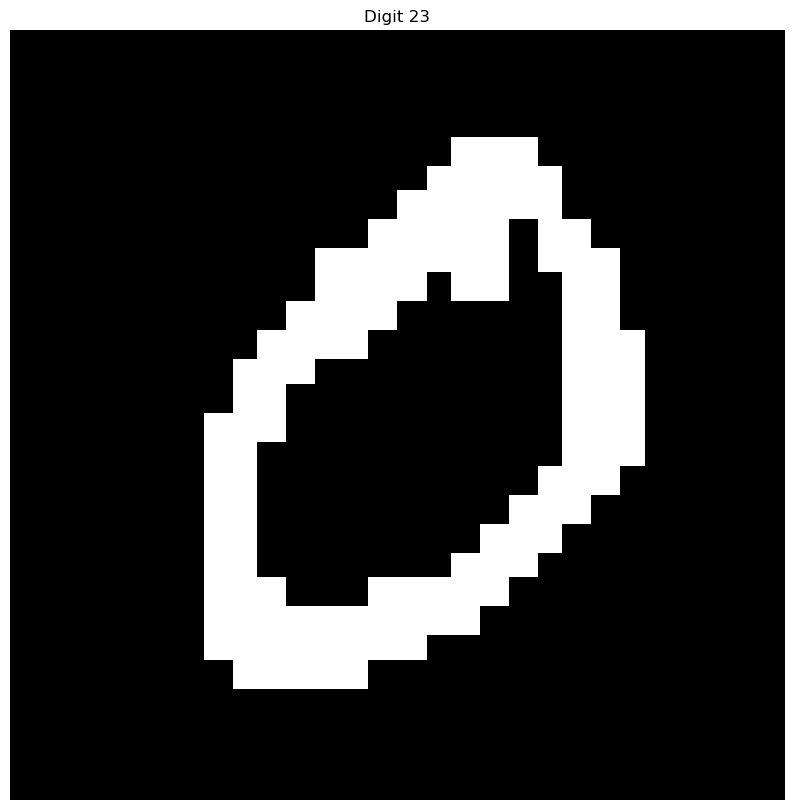

Digit 24 saved to extracted_digits/digit_24.png


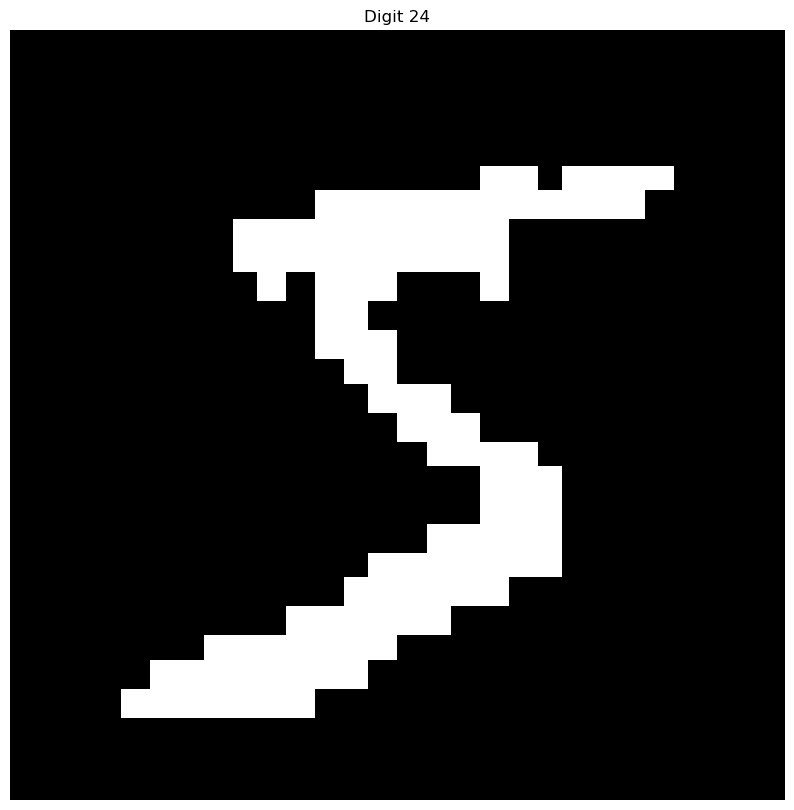

In [6]:
# Part 2: Display Contours
def create_contour_image(binary_image, contours):
    contour_image = np.zeros_like(binary_image)
    for contour in contours:
        if cv2.contourArea(contour) >= min_contour_area:
            cv2.drawContours(contour_image, [contour], -1, 255, thickness=1)
    return contour_image

# Generate and Display Contour Image
contour_image = create_contour_image(binary_image, contours)
show_image("Contours", contour_image, cmap="gray")

# Part 3: Extract and Display Digits
def extract_digits(image, contours, output_folder):
    for i, contour in enumerate(contours):
        if cv2.contourArea(contour) >= min_contour_area:
            x, y, w, h = cv2.boundingRect(contour)
            digit = image[y:y + h, x:x + w]
            digit_path = os.path.join(output_folder, f"digit_{i}.png")
            cv2.imwrite(digit_path, digit)
            print(f"Digit {i} saved to {digit_path}")
            show_image(f"Digit {i}", digit, cmap="gray")

# Extract and Display Digits
extract_digits(image, contours, output_folder)

# prediction 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image: annotated_image.png, Predicted Digit: 5


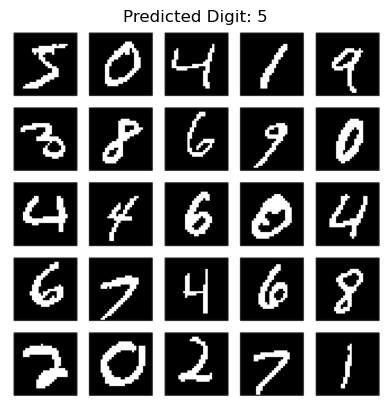

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: annotated_image_inverted_padded.png, Predicted Digit: 5


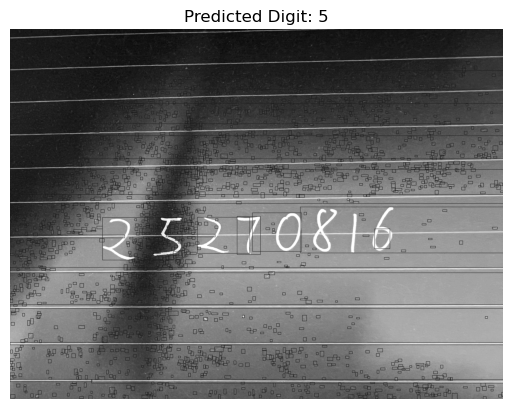

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: digit_0.png, Predicted Digit: 1


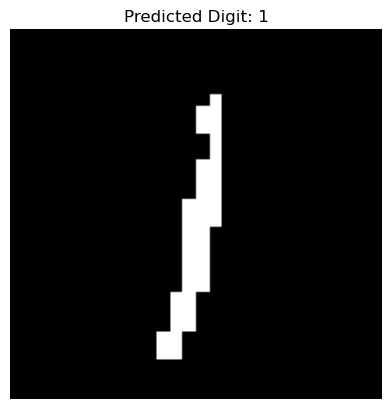

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image: digit_1.png, Predicted Digit: 7


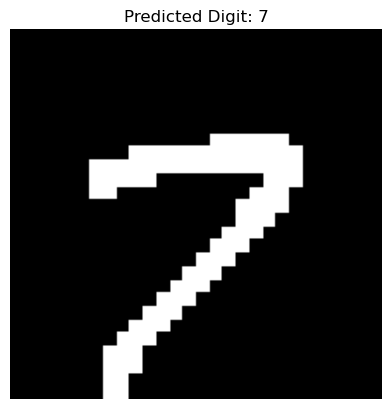

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: digit_10.png, Predicted Digit: 4


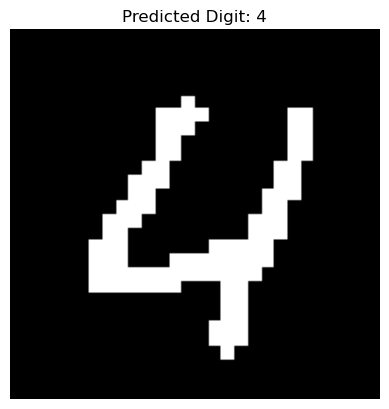

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: digit_11.png, Predicted Digit: 0


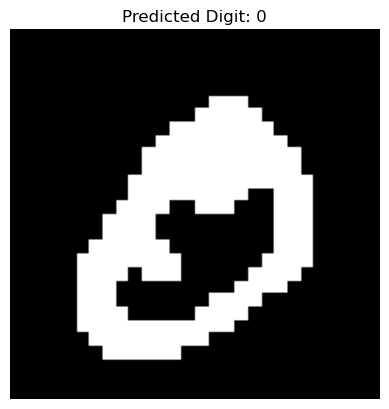

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: digit_12.png, Predicted Digit: 6


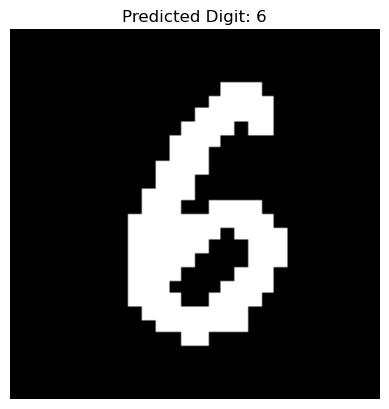

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: digit_13.png, Predicted Digit: 4


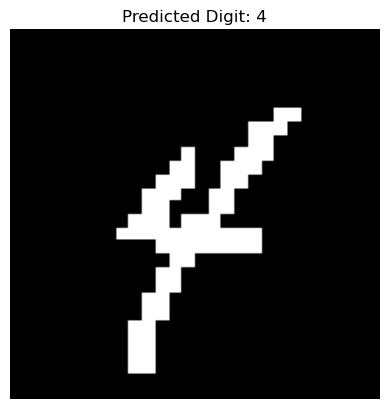

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image: digit_14.png, Predicted Digit: 4


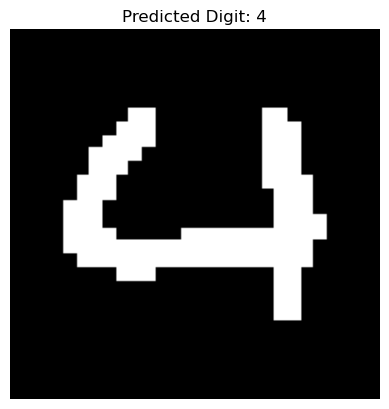

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image: digit_15.png, Predicted Digit: 0


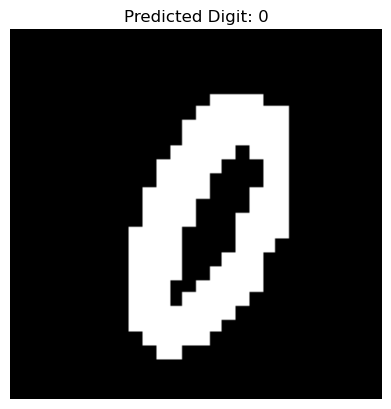

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: digit_16.png, Predicted Digit: 9


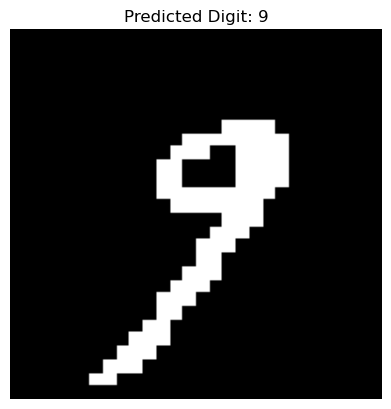

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Image: digit_17.png, Predicted Digit: 6


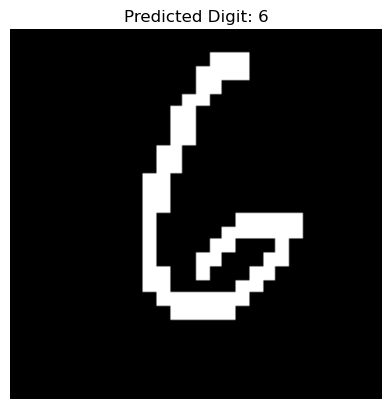

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: digit_18.png, Predicted Digit: 8


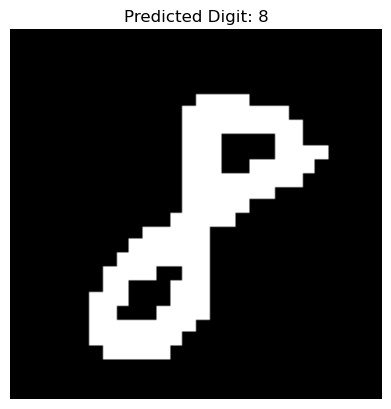

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image: digit_19.png, Predicted Digit: 3


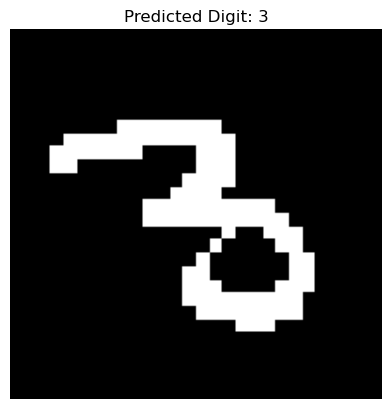

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image: digit_2.png, Predicted Digit: 2


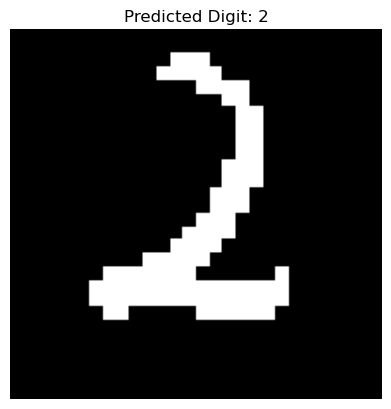

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: digit_20.png, Predicted Digit: 9


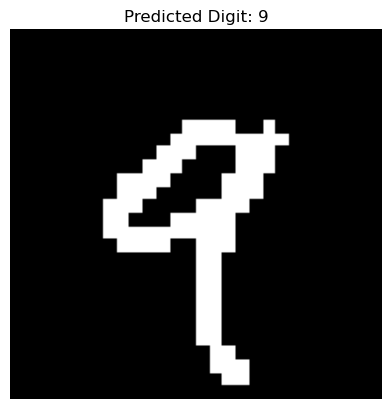

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: digit_21.png, Predicted Digit: 1


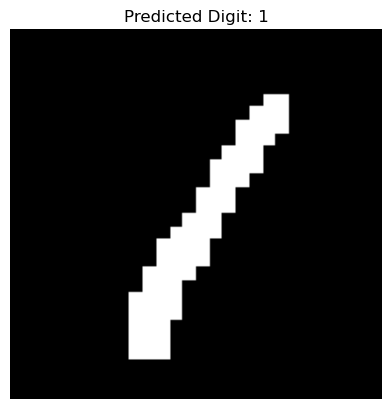

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: digit_22.png, Predicted Digit: 4


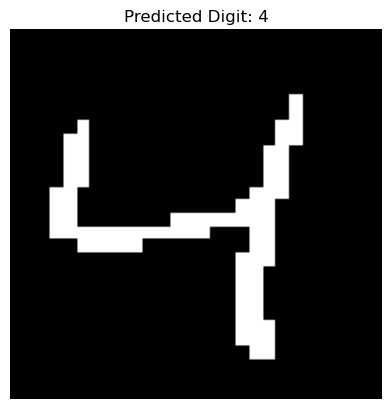

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: digit_23.png, Predicted Digit: 0


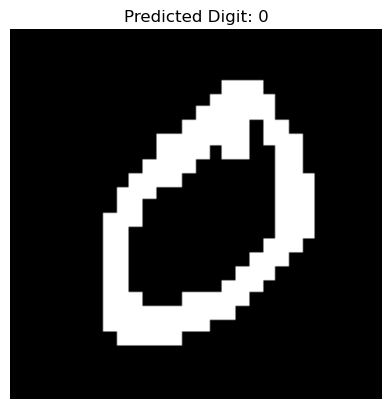

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: digit_24.png, Predicted Digit: 5


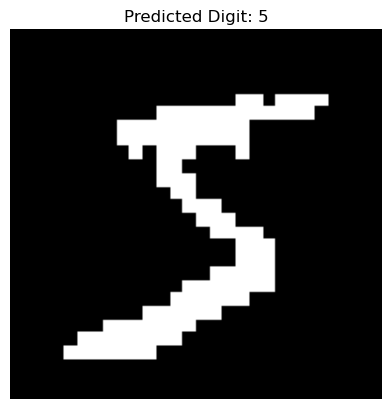

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: digit_3.png, Predicted Digit: 0


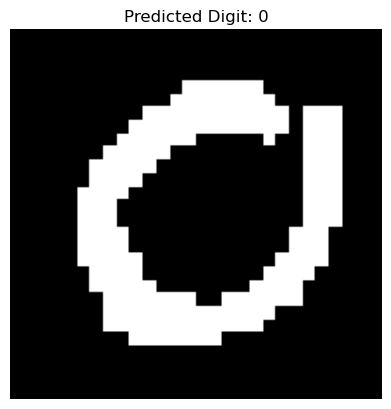

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: digit_4.png, Predicted Digit: 7


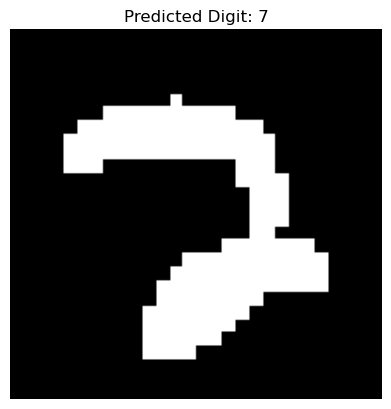

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: digit_5.png, Predicted Digit: 8


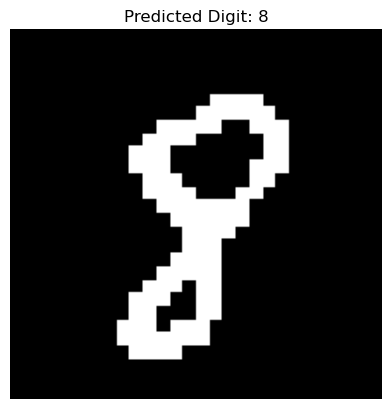

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: digit_6.png, Predicted Digit: 6


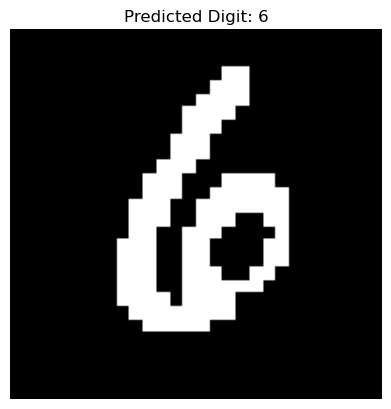

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: digit_7.png, Predicted Digit: 4


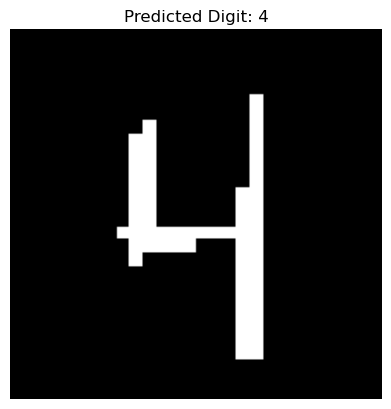

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: digit_8.png, Predicted Digit: 7


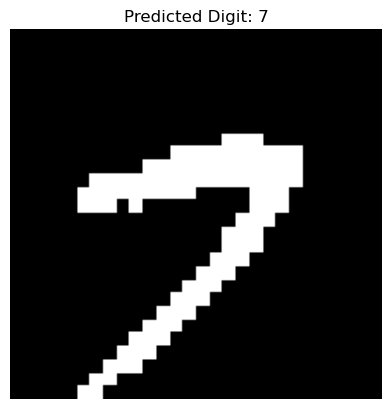

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: digit_9.png, Predicted Digit: 6


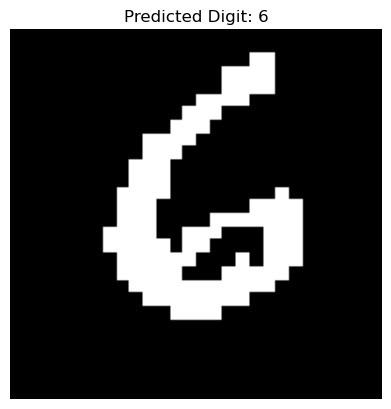

In [7]:
# Load the pre-trained MNIST model
model = tf.keras.models.load_model("my_mnist_model.h5")  # Path to your MNIST model

# Predict digits from the extracted images
for image_name in sorted(os.listdir(output_folder)):
    if not image_name.endswith(".png"):
        continue

    # Load and preprocess the image
    image_path = os.path.join(output_folder, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28, 28)) / 255.0  # Resize and normalize
    image = np.expand_dims(image, axis=(0, -1))  # Reshape for the model

    # Predict the digit
    prediction = model.predict(image)
    digit = np.argmax(prediction)

    # Display the result
    print(f"Image: {image_name}, Predicted Digit: {digit}")
    plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
    plt.title(f"Predicted Digit: {digit}")
    plt.axis('off')
    plt.show()

# Image 11 & inverse colors

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output paths
input_image_path = "segmented_011.png"  # Updated to use segmented_011.png
output_folder = "extracted_digits"
os.makedirs(output_folder, exist_ok=True)

# Step 1: Load the image
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Apply thresholding
# Use adaptive thresholding to handle variations in digit intensity
binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Step 3: Find contours
# Find external contours only (to exclude inner parts if digits are hollow)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a minimum contour area to filter out small noise
min_contour_area = 50

def show_image(title, img, cmap=None):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis("off")
    plt.show()


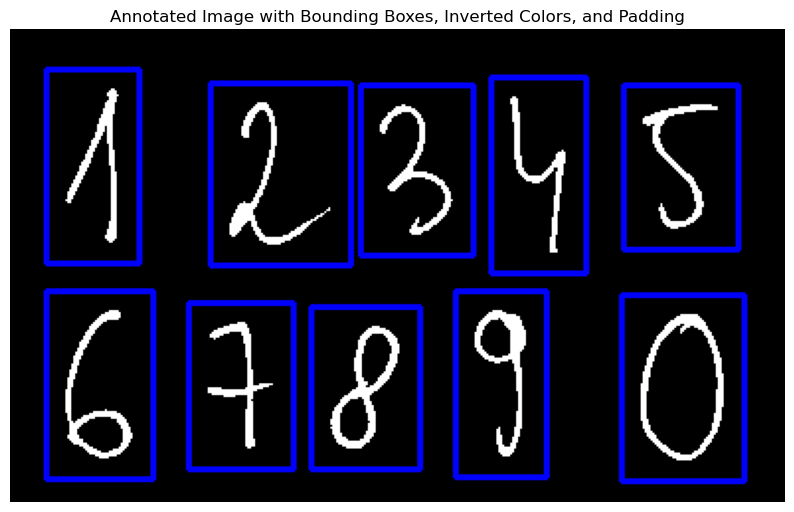

In [9]:
# Draw bounding boxes with inverted colors and padding
def draw_bounding_boxes_and_invert_with_padding(image, contours, min_contour_area, padding=10):
    # Invert the grayscale image
    inverted_image = cv2.bitwise_not(image)

    # Convert the inverted grayscale image to RGB for visualization
    visualized_image = cv2.cvtColor(inverted_image, cv2.COLOR_GRAY2BGR)

    for contour in contours:
        # Filter out small contours
        if cv2.contourArea(contour) < min_contour_area:
            continue

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Apply padding
        x = max(0, x - padding)  # Ensure x does not go below 0
        y = max(0, y - padding)  # Ensure y does not go below 0
        w = w + 2 * padding      # Increase width by 2 * padding
        h = h + 2 * padding      # Increase height by 2 * padding

        # Draw the padded bounding box on the visualized image
        cv2.rectangle(visualized_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle

    return visualized_image

# Generate bounding boxes image with inverted colors and padding
annotated_image = draw_bounding_boxes_and_invert_with_padding(image, contours, min_contour_area, padding=10)

# Save and display the annotated image with bounding boxes
annotated_image_path = os.path.join(output_folder, "annotated_image_inverted_padded.png")
cv2.imwrite(annotated_image_path, annotated_image)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.title("Annotated Image with Bounding Boxes, Inverted Colors, and Padding")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Rectangle 0 saved to rectangles/rectangle_0.png


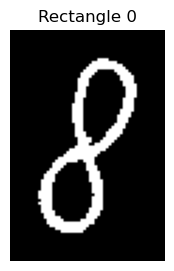

Rectangle 1 saved to rectangles/rectangle_1.png


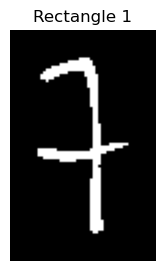

Rectangle 2 saved to rectangles/rectangle_2.png


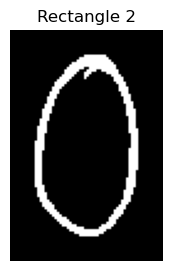

Rectangle 3 saved to rectangles/rectangle_3.png


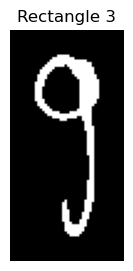

Rectangle 4 saved to rectangles/rectangle_4.png


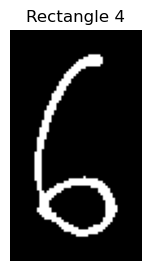

Rectangle 5 saved to rectangles/rectangle_5.png


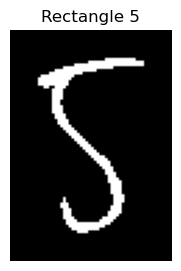

Rectangle 6 saved to rectangles/rectangle_6.png


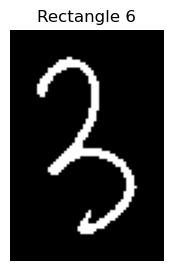

Rectangle 7 saved to rectangles/rectangle_7.png


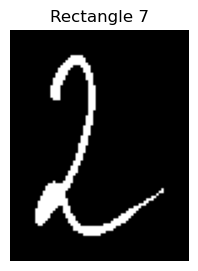

Rectangle 8 saved to rectangles/rectangle_8.png


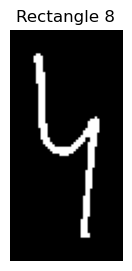

Rectangle 9 saved to rectangles/rectangle_9.png


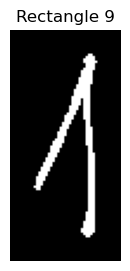

In [10]:
# Extract blue rectangular areas from the image
def extract_rectangular_areas(image, contours, min_contour_area, padding=10, output_folder="rectangles"):
    os.makedirs(output_folder, exist_ok=True)  # Ensure the output folder exists
    
    # Invert the grayscale image for consistent output (white digits on black background)
    inverted_image = cv2.bitwise_not(image)

    for i, contour in enumerate(contours):
        # Filter out small contours
        if cv2.contourArea(contour) < min_contour_area:
            continue

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Apply padding
        x = max(0, x - padding)  # Ensure x does not go below 0
        y = max(0, y - padding)  # Ensure y does not go below 0
        w = w + 2 * padding      # Increase width by 2 * padding
        h = h + 2 * padding      # Increase height by 2 * padding

        # Extract the rectangular region
        cropped_area = inverted_image[y:y + h, x:x + w]

        # Save the cropped area to the output folder
        cropped_path = os.path.join(output_folder, f"rectangle_{i}.png")
        cv2.imwrite(cropped_path, cropped_area)
        print(f"Rectangle {i} saved to {cropped_path}")

        # Display the cropped area for verification
        plt.figure(figsize=(3, 3))
        plt.title(f"Rectangle {i}")
        plt.imshow(cropped_area, cmap="gray")
        plt.axis('off')
        plt.show()

# Call the function to extract the rectangular areas
extract_rectangular_areas(image, contours, min_contour_area, padding=10, output_folder="rectangles")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Image: annotated_image.png, Predicted Digit: 5


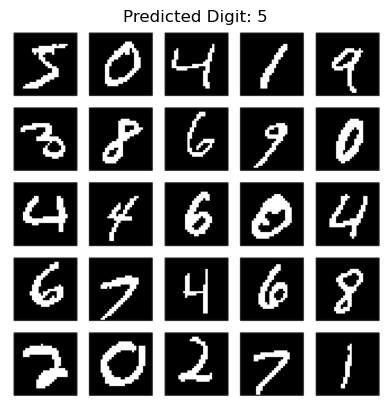

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: annotated_image_inverted_padded.png, Predicted Digit: 2


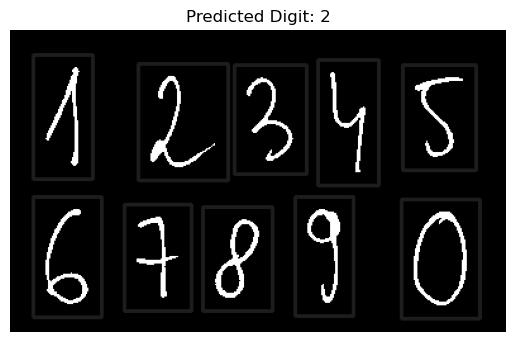

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: digit_0.png, Predicted Digit: 1


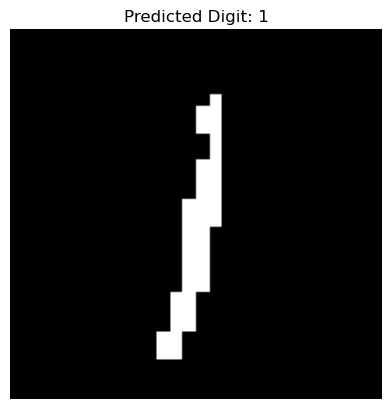

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: digit_1.png, Predicted Digit: 7


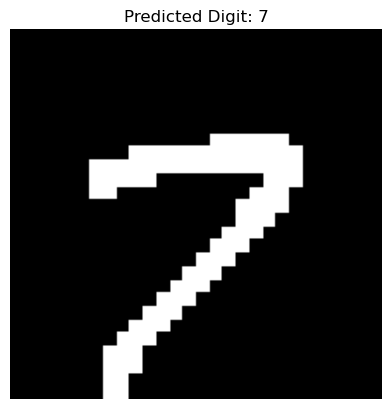

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: digit_10.png, Predicted Digit: 4


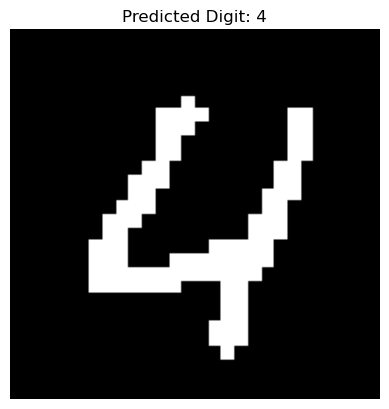

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image: digit_11.png, Predicted Digit: 0


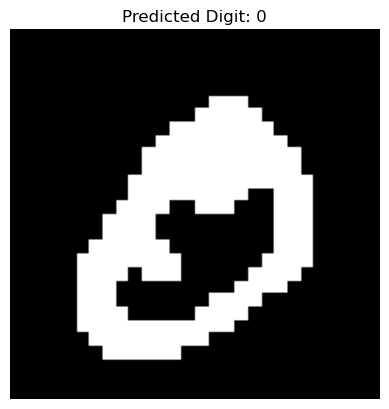

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: digit_12.png, Predicted Digit: 6


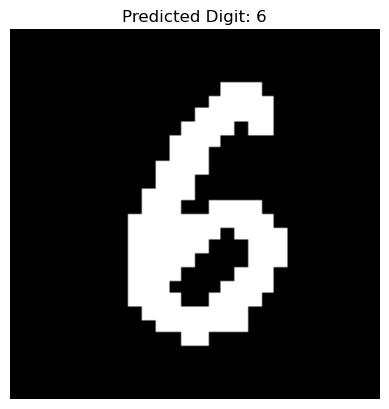

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: digit_13.png, Predicted Digit: 4


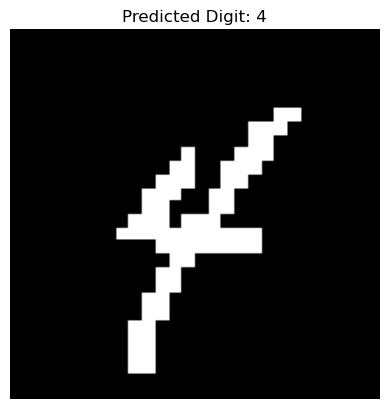

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: digit_14.png, Predicted Digit: 4


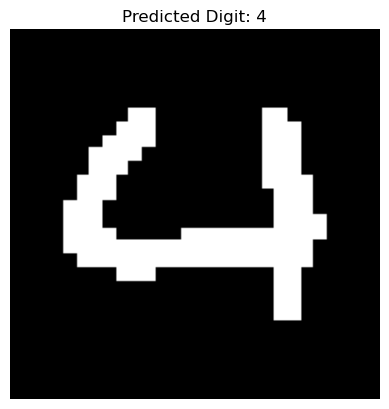

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: digit_15.png, Predicted Digit: 0


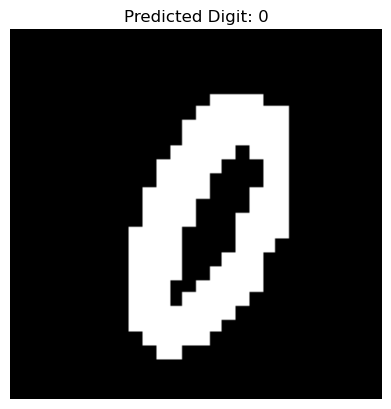

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: digit_16.png, Predicted Digit: 9


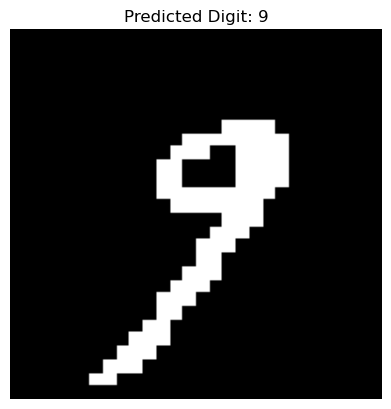

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: digit_17.png, Predicted Digit: 6


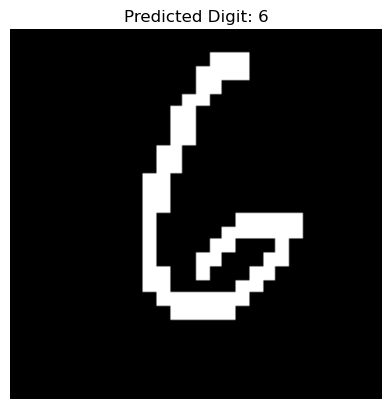

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: digit_18.png, Predicted Digit: 8


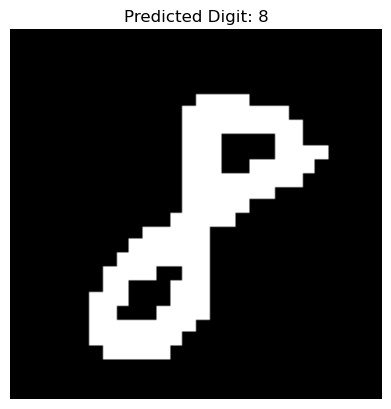

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: digit_19.png, Predicted Digit: 3


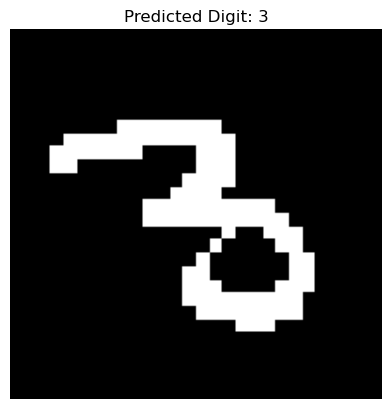

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image: digit_2.png, Predicted Digit: 2


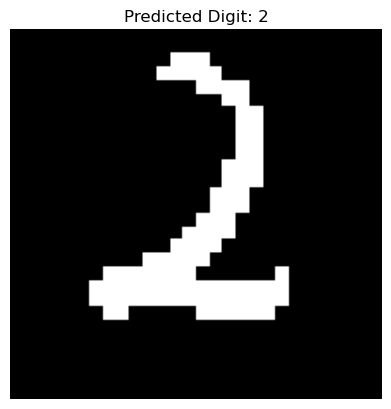

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: digit_20.png, Predicted Digit: 9


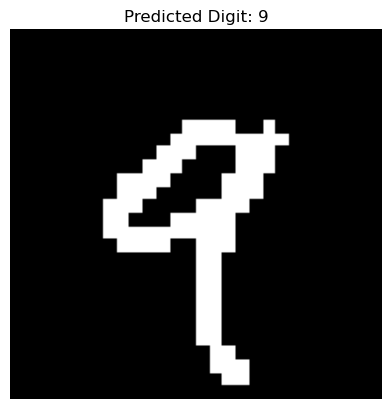

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: digit_21.png, Predicted Digit: 1


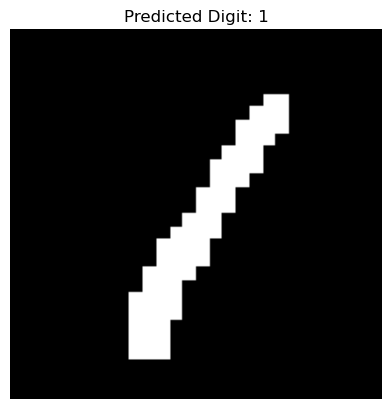

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: digit_22.png, Predicted Digit: 4


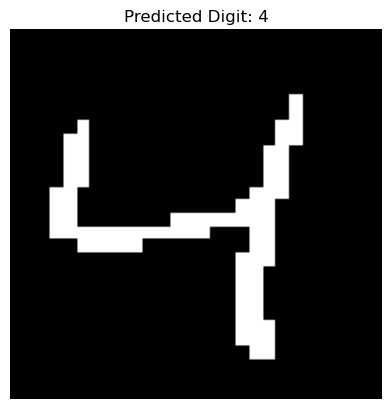

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: digit_23.png, Predicted Digit: 0


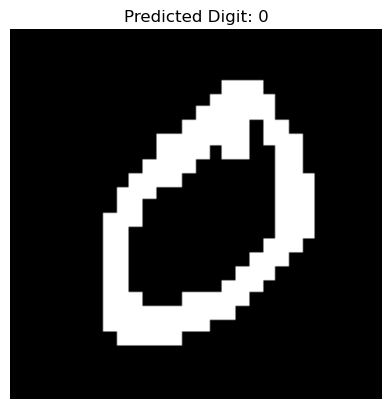

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Image: digit_24.png, Predicted Digit: 5


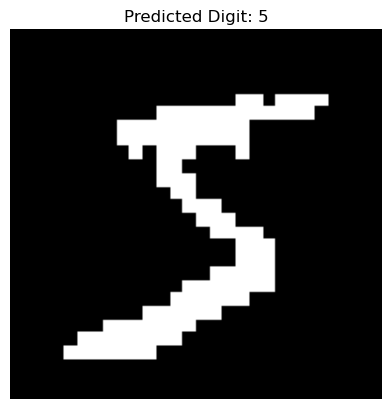

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: digit_3.png, Predicted Digit: 0


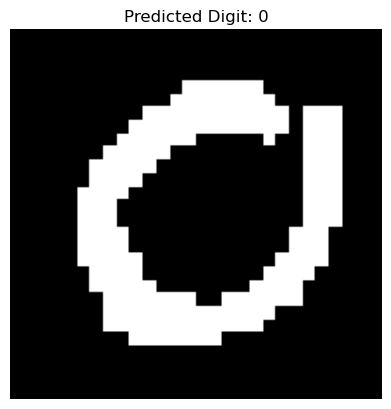

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: digit_4.png, Predicted Digit: 7


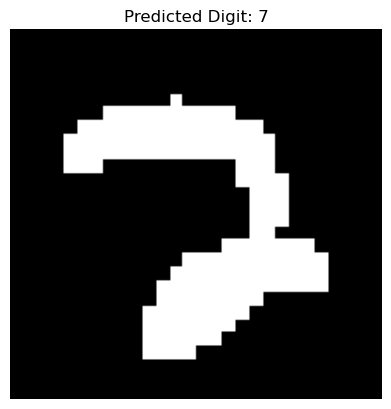

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: digit_5.png, Predicted Digit: 8


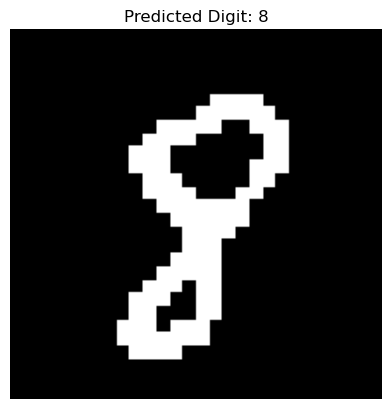

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: digit_6.png, Predicted Digit: 6


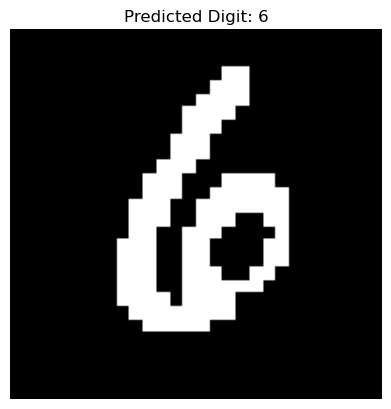

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: digit_7.png, Predicted Digit: 4


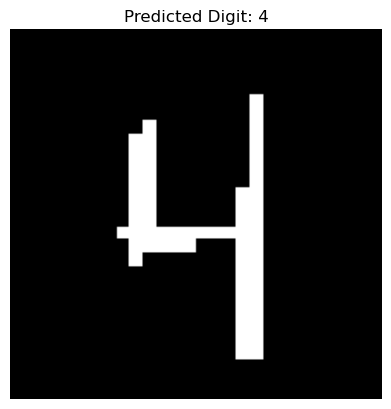

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Image: digit_8.png, Predicted Digit: 7


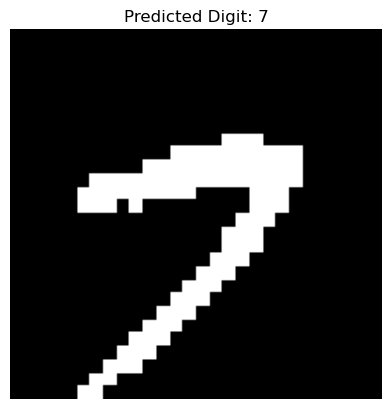

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: digit_9.png, Predicted Digit: 6


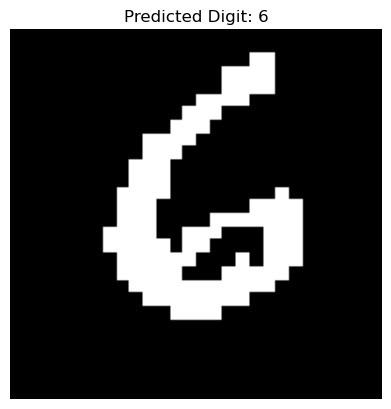

In [11]:
import tensorflow as tf

# Load the pre-trained MNIST model
model = tf.keras.models.load_model("my_mnist_model.h5")

def preprocess_and_predict(image_path, model):
    """Preprocess the image and predict the digit."""
    # Load the image, resize to 28x28, and normalize
    digit_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    digit_resized = cv2.resize(digit_image, (28, 28)) / 255.0
    digit_preprocessed = np.expand_dims(digit_resized, axis=(0, -1))  # Add batch and channel dimensions
    
    # Predict the digit
    prediction = model.predict(digit_preprocessed)
    predicted_label = np.argmax(prediction)
    return predicted_label

def predict_digits_in_folder(folder_path, model):
    """Predict digits for all images in a folder."""
    for file_name in sorted(os.listdir(folder_path)):
        if file_name.endswith(".png"):
            image_path = os.path.join(folder_path, file_name)
            predicted_label = preprocess_and_predict(image_path, model)
            print(f"Image: {file_name}, Predicted Digit: {predicted_label}")

            # Display the digit
            plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap="gray")
            plt.title(f"Predicted Digit: {predicted_label}")
            plt.axis("off")
            plt.show()

# Path to the folder containing extracted digit images
output_folder = "extracted_digits"

# Predict digits
predict_digits_in_folder(output_folder, model)


# Image 12

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output paths
input_image_path = "segmented_012.png"  # Updated to use segmented_011.png
output_folder = "extracted_digits"
os.makedirs(output_folder, exist_ok=True)

# Step 1: Load the image
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Apply thresholding
# Use adaptive thresholding to handle variations in digit intensity
binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Step 3: Find contours
# Find external contours only (to exclude inner parts if digits are hollow)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a minimum contour area to filter out small noise
min_contour_area = 50

def show_image(title, img, cmap=None):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis("off")
    plt.show()


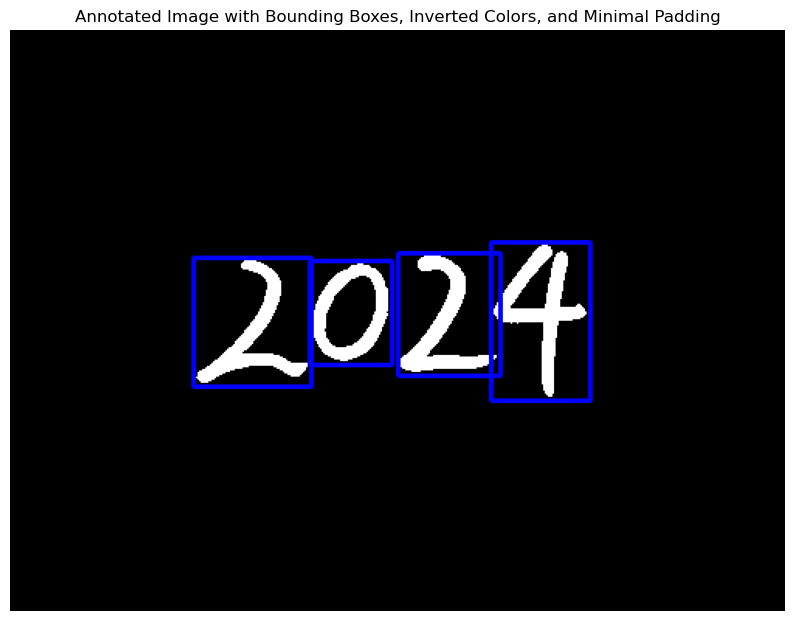

In [13]:
# Draw bounding boxes with inverted colors and minimal padding
def draw_bounding_boxes_and_invert_with_padding(image, contours, min_contour_area, padding=2):
    """
    Draw bounding boxes with minimal padding and inverted colors.
    :param image: Input grayscale image
    :param contours: Contours detected in the image
    :param min_contour_area: Minimum contour area to include
    :param padding: Extra space around the bounding boxes
    """
    # Invert the grayscale image
    inverted_image = cv2.bitwise_not(image)

    # Convert the inverted grayscale image to RGB for visualization
    visualized_image = cv2.cvtColor(inverted_image, cv2.COLOR_GRAY2BGR)

    for contour in contours:
        # Filter out small contours
        if cv2.contourArea(contour) < min_contour_area:
            continue

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Apply reduced padding (close bounding boxes)
        x = max(0, x - padding)  # Ensure x does not go below 0
        y = max(0, y - padding)  # Ensure y does not go below 0
        w = w + 2 * padding      # Increase width by 2 * padding
        h = h + 2 * padding      # Increase height by 2 * padding

        # Draw the padded bounding box on the visualized image
        cv2.rectangle(visualized_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle

    return visualized_image

# Generate bounding boxes image with minimal padding
annotated_image = draw_bounding_boxes_and_invert_with_padding(image, contours, min_contour_area, padding=2)

# Save and display the annotated image with bounding boxes
annotated_image_path = os.path.join(output_folder, "annotated_image_inverted_padded.png")
cv2.imwrite(annotated_image_path, annotated_image)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.title("Annotated Image with Bounding Boxes, Inverted Colors, and Minimal Padding")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# erosion

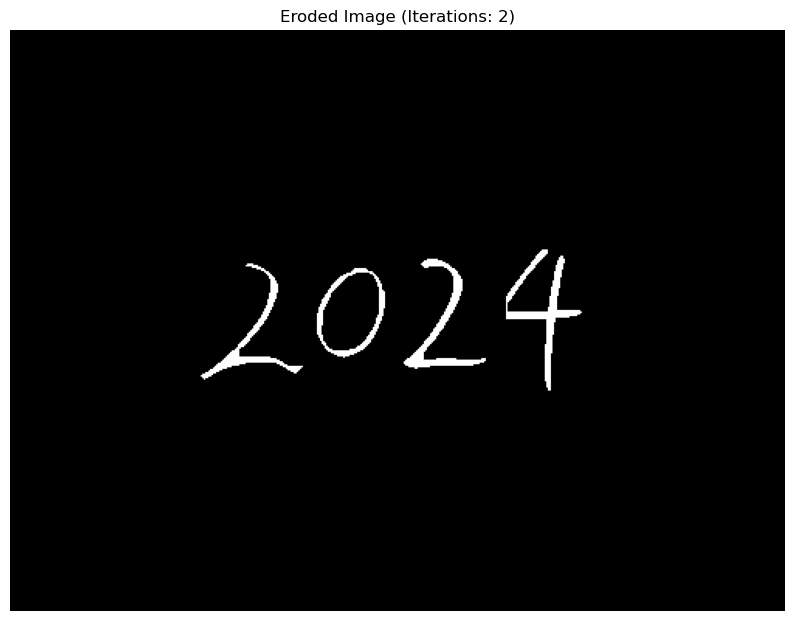

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = "extracted_digits/annotated_image_inverted_padded.png"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the kernel for erosion
kernel = np.ones((3, 3), np.uint8)  # Kernel size for erosion

# Apply erosion multiple times
iterations = 2  # Number of times to repeat erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=iterations)

# Save and display the eroded image
cv2.imwrite("repeated_erosion.png", eroded_image)
plt.figure(figsize=(10, 10))
plt.title(f"Eroded Image (Iterations: {iterations})")
plt.imshow(eroded_image, cmap="gray")
plt.axis("off")
plt.show()


Digit 0 saved to extracted_digits/digit_0.png


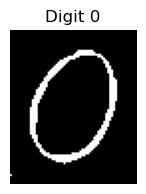

Digit 1 saved to extracted_digits/digit_1.png


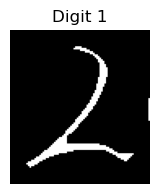

Digit 2 saved to extracted_digits/digit_2.png


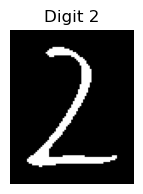

Digit 3 saved to extracted_digits/digit_3.png


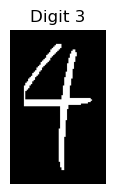

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output paths
input_image_path = "repeated_erosion.png"  # Path to the eroded image
output_folder = "extracted_digits"
os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist

# Step 1: Load the eroded image in grayscale
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Find contours
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a minimum contour area to filter noise
min_contour_area = 50  # Adjust as needed based on digit size
padding = 10  # Define padding around the bounding box

# Step 3: Extract digits using bounding boxes with padding
def extract_digits_with_padding(image, contours, min_contour_area, output_folder, padding):
    for i, contour in enumerate(contours):
        if cv2.contourArea(contour) >= min_contour_area:
            # Get bounding box
            x, y, w, h = cv2.boundingRect(contour)
            
            # Add padding to the bounding box
            x = max(0, x - padding)
            y = max(0, y - padding)
            w = w + 2 * padding
            h = h + 2 * padding

            # Extract the digit with padding
            digit = image[y:y + h, x:x + w]

            # Save the digit
            digit_path = os.path.join(output_folder, f"digit_{i}.png")
            cv2.imwrite(digit_path, digit)
            print(f"Digit {i} saved to {digit_path}")

            # Display the digit
            plt.figure(figsize=(2, 2))
            plt.title(f"Digit {i}")
            plt.imshow(digit, cmap="gray")
            plt.axis("off")
            plt.show()

# Step 4: Call the function to extract digits
extract_digits_with_padding(image, contours, min_contour_area, output_folder, padding)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Image: annotated_image.png, Predicted Digit: 5


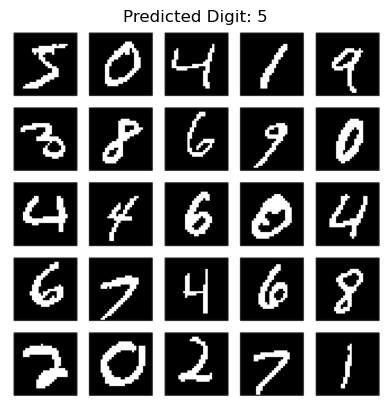

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: annotated_image_inverted_padded.png, Predicted Digit: 4


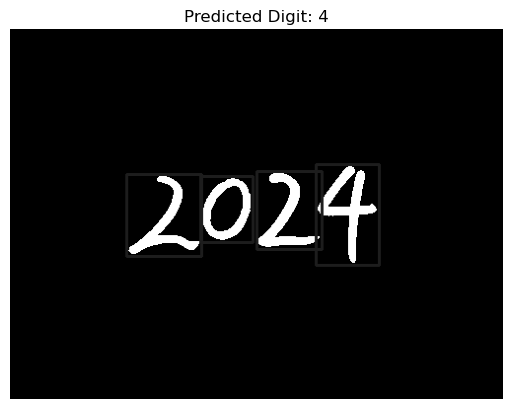

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: digit_0.png, Predicted Digit: 0


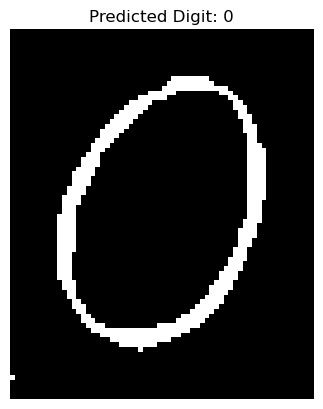

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: digit_1.png, Predicted Digit: 2


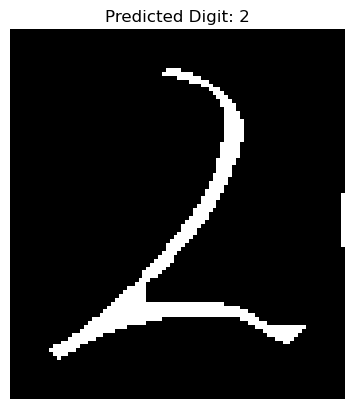

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: digit_10.png, Predicted Digit: 4


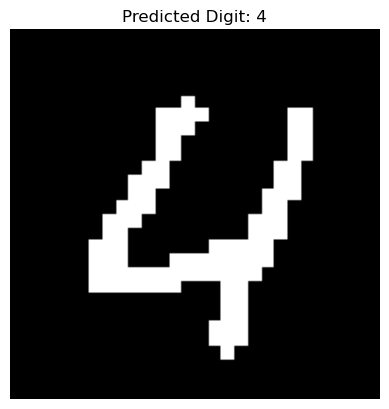

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: digit_11.png, Predicted Digit: 0


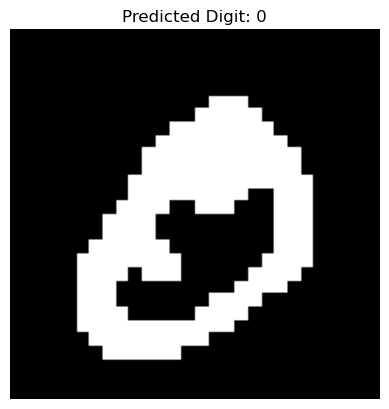

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: digit_12.png, Predicted Digit: 6


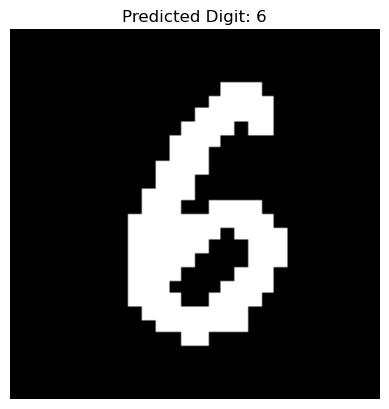

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: digit_13.png, Predicted Digit: 4


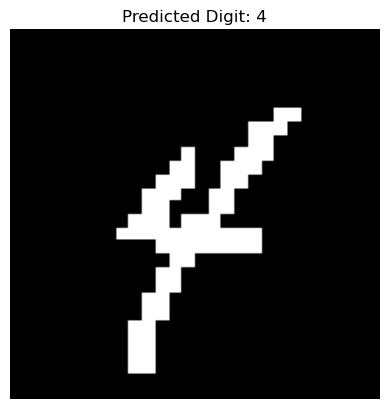

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: digit_14.png, Predicted Digit: 4


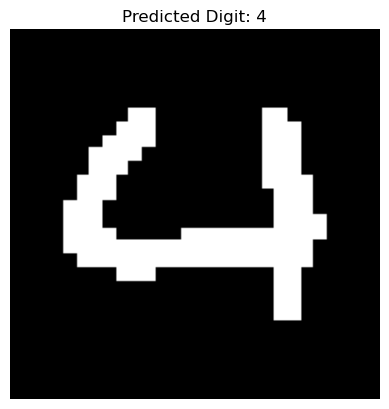

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: digit_15.png, Predicted Digit: 0


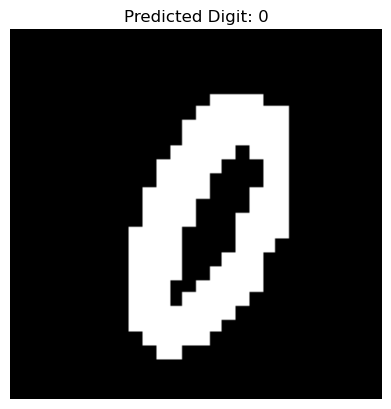

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: digit_16.png, Predicted Digit: 9


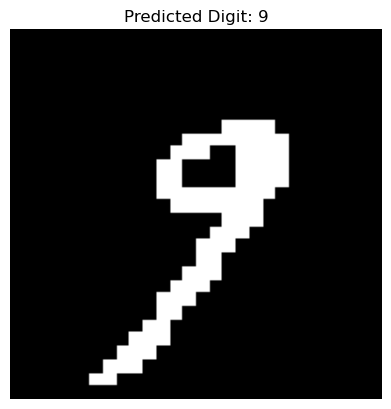

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: digit_17.png, Predicted Digit: 6


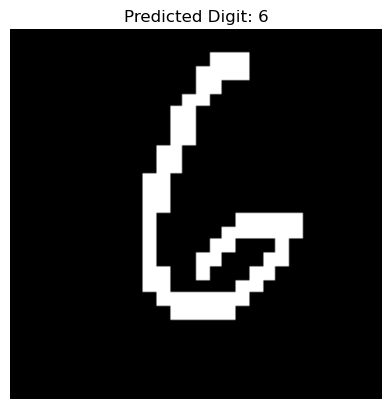

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: digit_18.png, Predicted Digit: 8


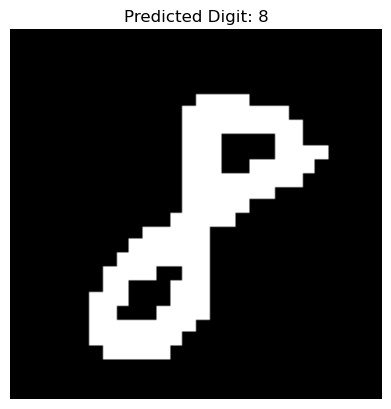

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: digit_19.png, Predicted Digit: 3


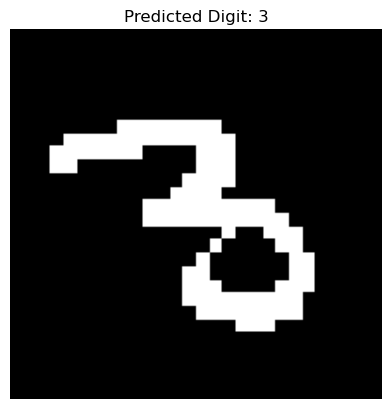

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: digit_2.png, Predicted Digit: 2


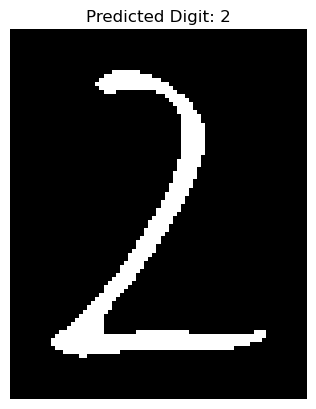

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: digit_20.png, Predicted Digit: 9


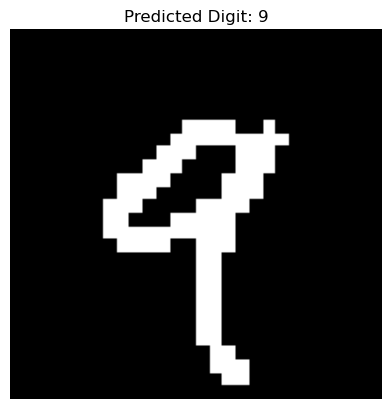

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: digit_21.png, Predicted Digit: 1


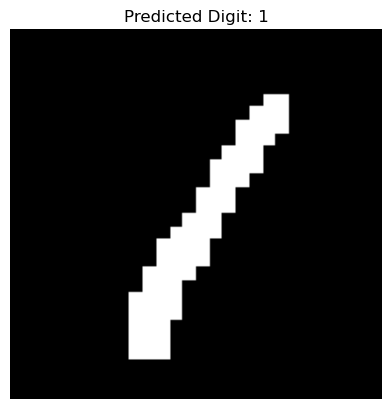

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: digit_22.png, Predicted Digit: 4


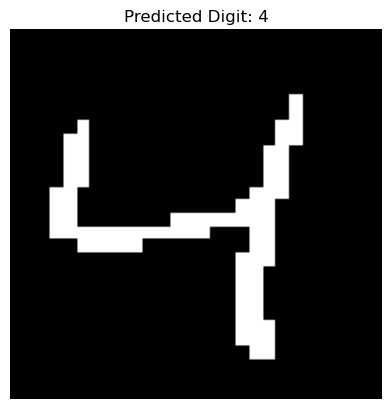

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: digit_23.png, Predicted Digit: 0


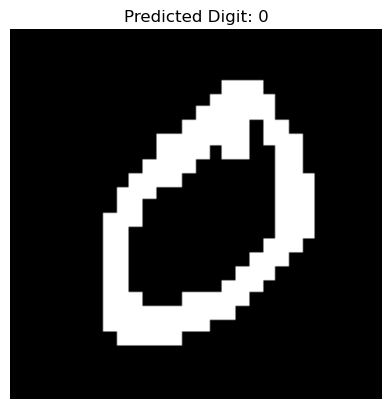

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: digit_24.png, Predicted Digit: 5


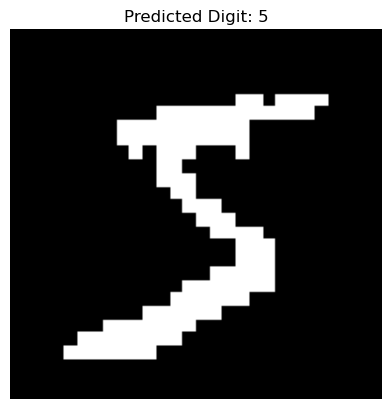

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: digit_3.png, Predicted Digit: 8


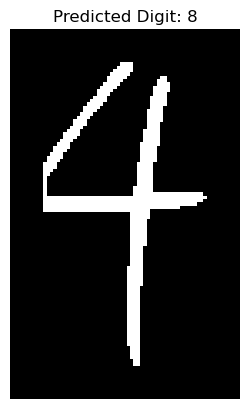

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: digit_4.png, Predicted Digit: 7


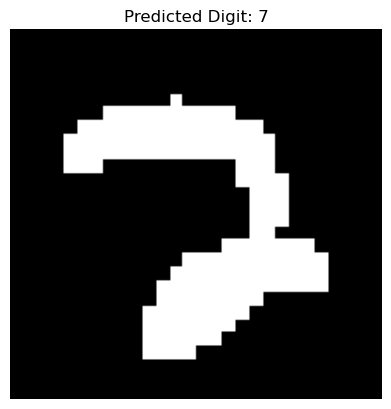

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: digit_5.png, Predicted Digit: 8


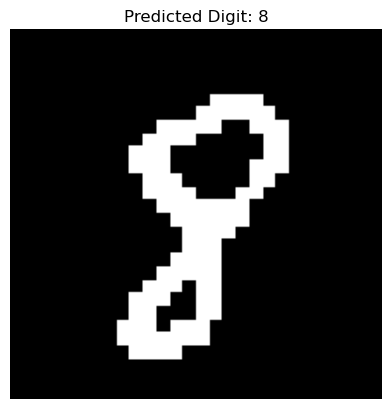

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: digit_6.png, Predicted Digit: 6


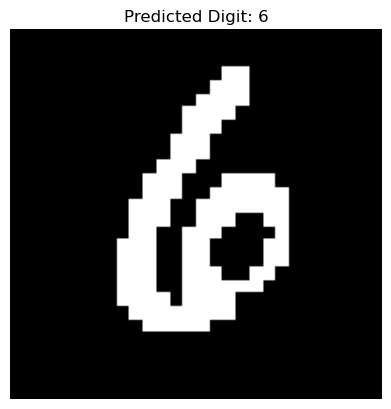

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: digit_7.png, Predicted Digit: 4


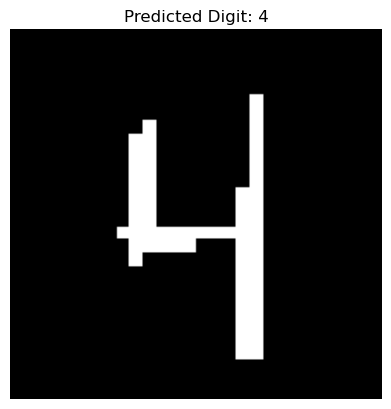

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: digit_8.png, Predicted Digit: 7


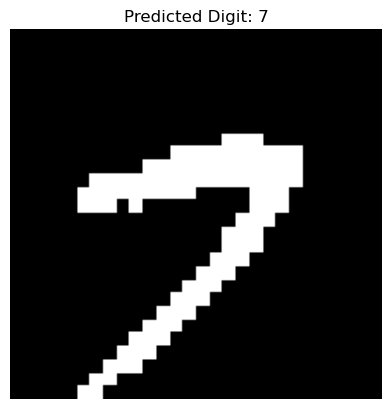

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: digit_9.png, Predicted Digit: 6


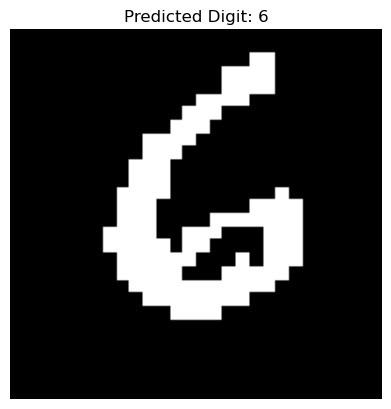

In [16]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Load the pre-trained MNIST model
model = tf.keras.models.load_model("my_mnist_model.h5")  # Replace with your model's path

# Preprocess digit for MNIST model
def preprocess_digit(image_path):
    """Preprocess the digit image for MNIST model prediction."""
    # Load the digit image in grayscale
    digit_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to 28x28 (MNIST input size)
    digit_resized = cv2.resize(digit_image, (28, 28))
    
    # Normalize pixel values to [0, 1]
    digit_normalized = digit_resized / 255.0
    
    # Expand dimensions to match model input shape: (1, 28, 28, 1)
    digit_preprocessed = np.expand_dims(digit_normalized, axis=(0, -1))
    return digit_preprocessed

# Predict digits from the extracted images
def predict_digits(folder_path, model):
    """Predict digits for all images in a folder."""
    for file_name in sorted(os.listdir(folder_path)):
        if file_name.endswith(".png"):
            # Full path to the digit image
            image_path = os.path.join(folder_path, file_name)
            
            # Preprocess the digit
            digit_preprocessed = preprocess_digit(image_path)
            
            # Predict the digit using the model
            prediction = model.predict(digit_preprocessed)
            predicted_label = np.argmax(prediction)
            
            # Display the result
            print(f"Image: {file_name}, Predicted Digit: {predicted_label}")
            plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap="gray")
            plt.title(f"Predicted Digit: {predicted_label}")
            plt.axis("off")
            plt.show()

# Path to the folder containing extracted digit images
extracted_digits_folder = "extracted_digits"

# Predict the digits
predict_digits(extracted_digits_folder, model)


# Image 13

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define input and output paths
input_image_path = "segmented_013.png"  # Updated to use segmented_011.png
output_folder = "extracted_digits"
os.makedirs(output_folder, exist_ok=True)

# Step 1: Load the image
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Apply thresholding
# Use adaptive thresholding to handle variations in digit intensity
binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Step 3: Find contours
# Find external contours only (to exclude inner parts if digits are hollow)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a minimum contour area to filter out small noise
min_contour_area = 50

def show_image(title, img, cmap=None):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis("off")
    plt.show()


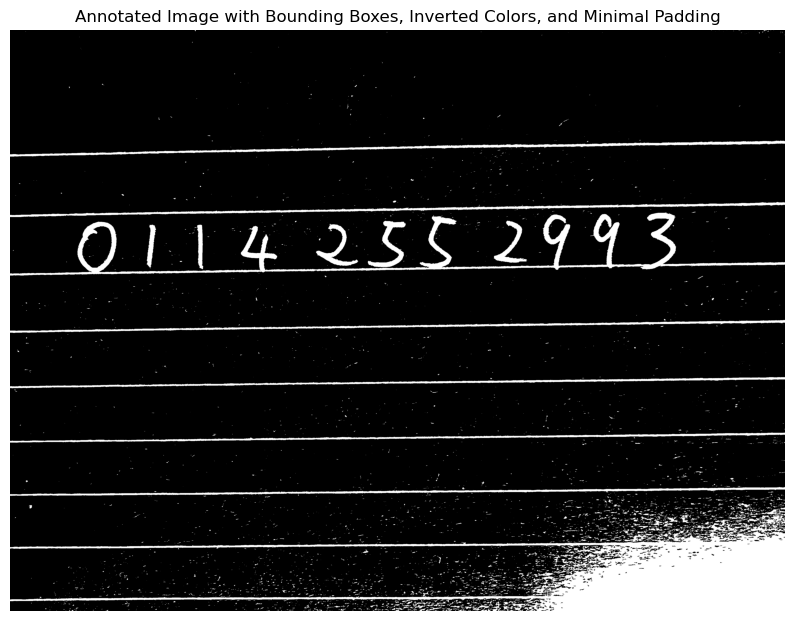

In [18]:
# Draw bounding boxes with inverted colors and minimal padding
def draw_bounding_boxes_and_invert_with_padding(image, contours, min_contour_area, padding=2):
    """
    Draw bounding boxes with minimal padding and inverted colors.
    :param image: Input grayscale image
    :param contours: Contours detected in the image
    :param min_contour_area: Minimum contour area to include
    :param padding: Extra space around the bounding boxes
    """
    # Invert the grayscale image
    inverted_image = cv2.bitwise_not(image)

    # Convert the inverted grayscale image to RGB for visualization
    visualized_image = cv2.cvtColor(inverted_image, cv2.COLOR_GRAY2BGR)

    for contour in contours:
        # Filter out small contours
        if cv2.contourArea(contour) < min_contour_area:
            continue

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)

    return visualized_image

# Generate bounding boxes image with minimal padding
annotated_image = draw_bounding_boxes_and_invert_with_padding(image, contours, min_contour_area, padding=2)

# Save and display the annotated image with bounding boxes
annotated_image_path = os.path.join(output_folder, "annotated_image_inverted_padded.png")
cv2.imwrite(annotated_image_path, annotated_image)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.title("Annotated Image with Bounding Boxes, Inverted Colors, and Minimal Padding")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Cleaned image saved to cleaned_image.png


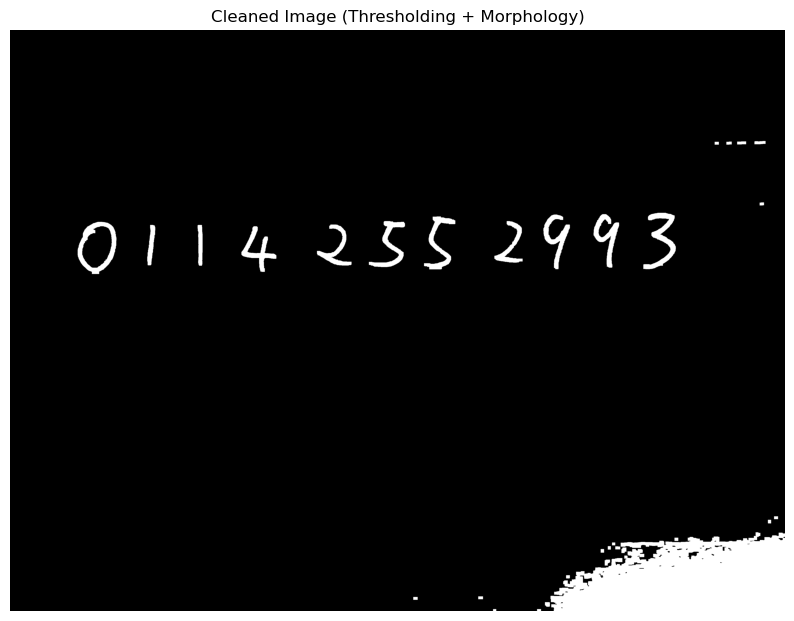

In [19]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define input and output paths
input_image_path = "extracted_digits/annotated_image_inverted_padded.png"  # Path to the original image
output_cleaned_image_path = "cleaned_image.png"  # Path to save the cleaned image

# Load the grayscale image
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Step 2: Apply morphological operations to clean up noise
kernel = np.ones((15, 15), np.uint8)  # Define the kernel size
cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=1)

# Save the cleaned image
cv2.imwrite(output_cleaned_image_path, cleaned_image)
print(f"Cleaned image saved to {output_cleaned_image_path}")

# Display the cleaned image
plt.figure(figsize=(10, 10))
plt.title("Cleaned Image (Thresholding + Morphology)")
plt.imshow(cleaned_image, cmap="gray")
plt.axis("off")
plt.show()


Image Dimensions: Height=3024, Width=4032
Upper half of the image saved to upper_half_image.png


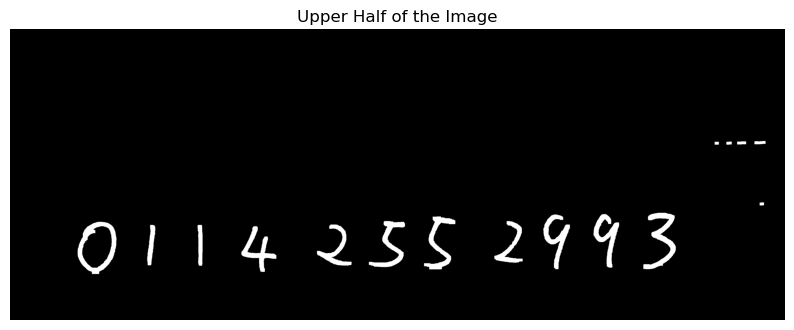

In [20]:
import cv2
import matplotlib.pyplot as plt

# Define input and output paths
input_image_path = "cleaned_image.png"  # Path to the original image
output_image_path = "upper_half_image.png"  # Path to save the upper half image

# Load the image in grayscale
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Get the height and width of the image
height, width = image.shape
print(f"Image Dimensions: Height={height}, Width={width}")

# Define the region for the upper half (0 to middle of height)
y_start, y_end = 0, height // 2
x_start, x_end = 0, width   # Full width

# Crop the upper half
upper_half_image = image[y_start:y_end, x_start:x_end]

# Save the cropped image
cv2.imwrite(output_image_path, upper_half_image)
print(f"Upper half of the image saved to {output_image_path}")

# Display the cropped image
plt.figure(figsize=(10, 10))
plt.title("Upper Half of the Image")
plt.imshow(upper_half_image, cmap="gray")
plt.axis("off")
plt.show()


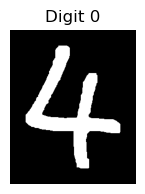

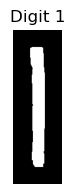

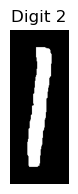

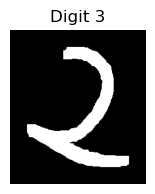

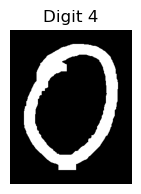

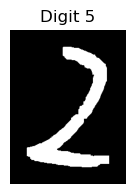

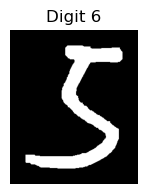

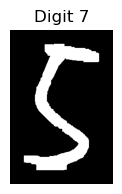

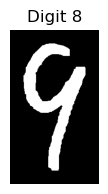

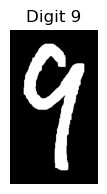

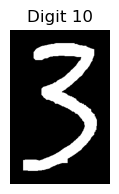

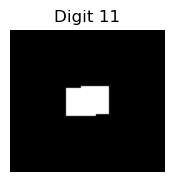

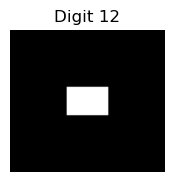

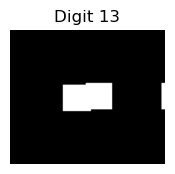

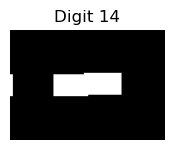

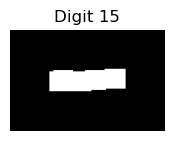

Digits have been extracted, saved, and displayed with increased padding from 'upper_half_image.png'.


In [21]:
import cv2
import os
import matplotlib.pyplot as plt

# Define input and output paths
input_cropped_image_path = "upper_half_image.png"  # Path to the cropped image
output_folder = "extracted_digits"  # Folder to save extracted digits
os.makedirs(output_folder, exist_ok=True)  # Ensure the output folder exists

# Load the cropped image in grayscale
cropped_image = cv2.imread(input_cropped_image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Find contours in the cropped image
contours, _ = cv2.findContours(cropped_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a minimum contour area to filter noise
min_contour_area = 50  # Adjust as needed based on digit size
padding = 30  # Increase padding around the bounding boxes

# Step 2: Extract and display digits with increased padding
def extract_and_display_digits(image, contours, min_contour_area, padding, output_folder):
    """
    Extract digits with increased padding, save them to the output folder, and display them.
    """
    digit_index = 0  # Index for naming extracted digits

    for contour in contours:
        # Filter out small contours based on area
        if cv2.contourArea(contour) < min_contour_area:
            continue

        # Get the bounding box for the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Add increased padding to the bounding box
        x = max(0, x - padding)
        y = max(0, y - padding)
        w = w + 2 * padding
        h = h + 2 * padding

        # Extract the digit using the bounding box
        digit = image[y:y + h, x:x + w]

        # Save the extracted digit
        digit_path = os.path.join(output_folder, f"digit_{digit_index}.png")
        cv2.imwrite(digit_path, digit)

        # Display the extracted digit
        plt.figure(figsize=(2, 2))
        plt.title(f"Digit {digit_index}")
        plt.imshow(digit, cmap="gray")
        plt.axis("off")
        plt.show()

        # Increment the digit index
        digit_index += 1

# Extract, save, and display the digits with increased padding
extract_and_display_digits(cropped_image, contours, min_contour_area, padding, output_folder)

print(f"Digits have been extracted, saved, and displayed with increased padding from '{input_cropped_image_path}'.")


Skipping 'extracted_digits/.DS_Store' as it could not be loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


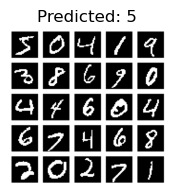

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


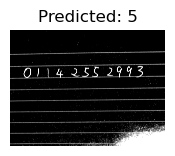

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


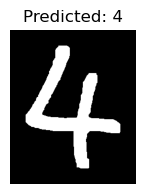

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


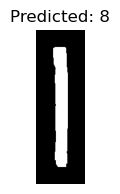

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


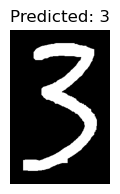

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


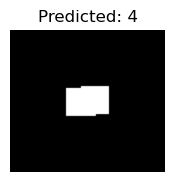

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


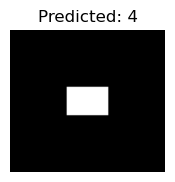

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


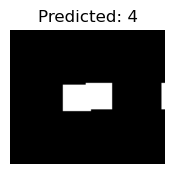

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


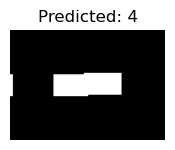

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


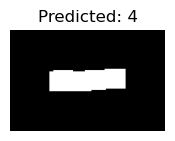

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


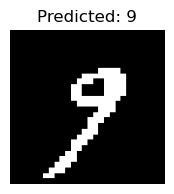

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


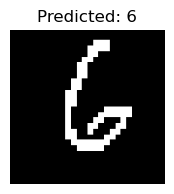

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


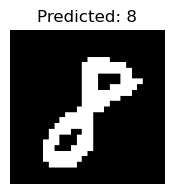

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


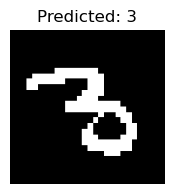

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


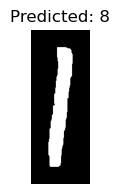

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


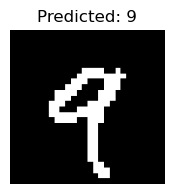

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


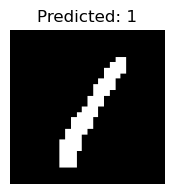

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


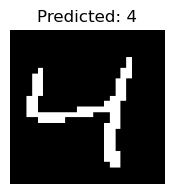

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


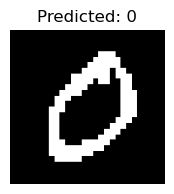

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


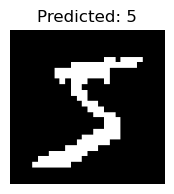

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


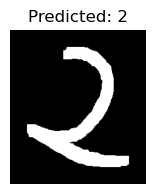

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


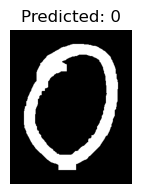

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


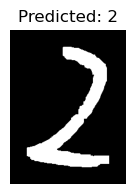

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


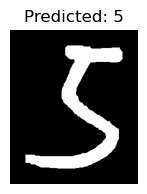

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


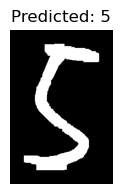

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


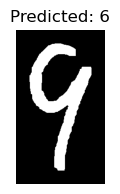

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


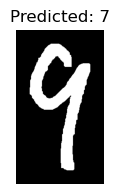

In [22]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the pre-trained MNIST model
model = tf.keras.models.load_model("my_mnist_model.h5")  # Replace with your MNIST model path

# Path to the folder containing extracted digits
extracted_digits_folder = "extracted_digits"  # Folder with digit images

# Verify the folder exists
if not os.path.exists(extracted_digits_folder):
    raise FileNotFoundError(f"The folder '{extracted_digits_folder}' does not exist.")

# Predict digits from the folder
def predict_digits_from_folder(folder_path, model):
    """
    Predict digits for all images in a folder.
    """
    # Iterate through all image files in the folder
    for file_name in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)

        # Load the image in grayscale
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Skipping '{file_path}' as it could not be loaded.")
            continue

        # Preprocess the image for prediction
        digit_resized = cv2.resize(image, (28, 28))  # Resize to 28x28
        digit_normalized = digit_resized / 255.0  # Normalize pixel values
        digit_preprocessed = np.expand_dims(digit_normalized, axis=(0, -1))  # Add batch and channel dimensions

        # Predict the digit
        prediction = model.predict(digit_preprocessed)
        predicted_label = np.argmax(prediction)

        # Display the image and prediction
        plt.figure(figsize=(2, 2))
        plt.title(f"Predicted: {predicted_label}")
        plt.imshow(image, cmap="gray")
        plt.axis("off")
        plt.show()

# Call the function to predict digits
predict_digits_from_folder(extracted_digits_folder, model)


# Image 14

Original Image Dimensions: Width = 4032, Height = 3024
Further cropped image saved to reduced_height_image.png


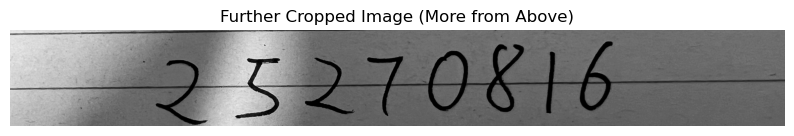

In [4]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the image
input_image_path = "014.png"  # Replace with your image path
output_image_path = "reduced_height_image.png"  # Path to save the reduced height image
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Get original dimensions
original_height, original_width = image.shape
print(f"Original Image Dimensions: Width = {original_width}, Height = {original_height}")

# Step 3: Define the region for cropping (reduce height)
# Keep the central portion of the image but crop more from the top
new_height = 500  # Final height for the cropped image
extra_crop_from_top = 130  # Increase crop from the top

y_start = (original_height - new_height) // 2 + extra_crop_from_top  # Crop more from the top

# Ensure the crop region is within the bounds of the image
if y_start < 0:
    y_start = 0

# Define the cropping area
cropped_image = image[y_start:y_start + new_height, :]

# Step 4: Save and display the cropped image
cv2.imwrite(output_image_path, cropped_image)
print(f"Further cropped image saved to {output_image_path}")

plt.figure(figsize=(10, 5))
plt.title("Further Cropped Image (More from Above)")
plt.imshow(cropped_image, cmap="gray")
plt.axis("off")
plt.show()

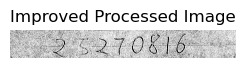

Processed image saved at: improved_processed_image.png


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
input_image_path = "reduced_height_image.png"  # Replace with your path
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Shadow Removal
dilated_img = cv2.dilate(image, np.ones((15, 15), np.uint8))
bg_img = cv2.medianBlur(dilated_img, 31)
shadow_removed = cv2.absdiff(image, bg_img)
shadow_removed = cv2.normalize(shadow_removed, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Step 2: Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    shadow_removed, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Step 3: Digit Enhancement
kernel = np.ones((3, 3), np.uint8)
digit_enhanced = cv2.dilate(adaptive_thresh, kernel, iterations=1)

# Save and Display the Results
output_improved_path = "improved_processed_image.png"
cv2.imwrite(output_improved_path, digit_enhanced)

plt.subplot(1, 2, 2)
plt.title("Improved Processed Image")
plt.imshow(digit_enhanced, cmap="gray")
plt.axis("off")

plt.show()

print(f"Processed image saved at: {output_improved_path}")


Improved image saved to improved_image.png


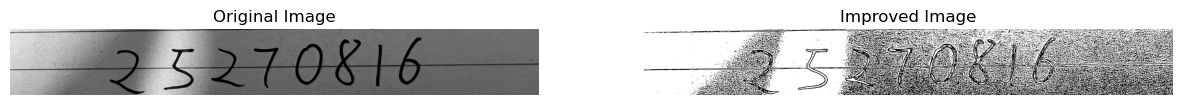

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
input_image_path = "reduced_height_image.png"  # Replace with your image path
output_image_path = "improved_image.png"
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Increase contrast (using histogram equalization)
contrast_image = cv2.equalizeHist(image)

# Step 2: Remove shadows (using Gaussian blur and normalization)
blurred = cv2.GaussianBlur(contrast_image, (15, 15), 0)  # Adjust kernel size as needed
shadow_removed = cv2.divide(contrast_image, blurred, scale=255)

# Step 3: Apply adaptive thresholding for binarization
binary_image = cv2.adaptiveThreshold(
    shadow_removed, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 10
)

# Step 4: Apply morphological operations to clean up small noise
kernel = np.ones((3, 3), np.uint8)  # Define a small kernel
cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=1)

# Save and display the improved image
cv2.imwrite(output_image_path, cleaned_image)
print(f"Improved image saved to {output_image_path}")

# Display the original and improved images
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Improved Image")
plt.imshow(cleaned_image, cmap="gray")
plt.axis("off")

plt.show()


# morphology operations

Dilated image saved to improved_image.png


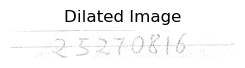

In [7]:
# Step 4: Apply dilation to enhance digits
kernel = np.ones((3, 3), np.uint8)  # Define the kernel size for dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)  # Adjust iterations if needed

# Save and display the improved image
cv2.imwrite(output_image_path, dilated_image)
print(f"Dilated image saved to {output_image_path}")

plt.subplot(1, 2, 2)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap="gray")
plt.axis("off")

plt.show()

Image with detected digits saved to improved_image.png


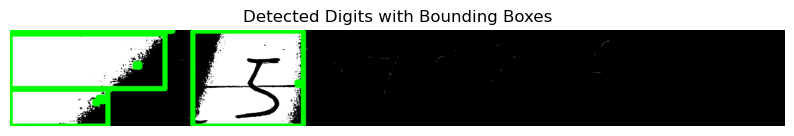

In [8]:
# Step 2: Apply binary thresholding to clean up the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Step 3: Find contours to detect digits
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 4: Draw bounding boxes around detected digits
annotated_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for visualization
min_contour_area = 100  # Minimum contour area to filter small noise

for contour in contours:
    if cv2.contourArea(contour) >= min_contour_area:
        x, y, w, h = cv2.boundingRect(contour)  # Get bounding box coordinates
        cv2.rectangle(annotated_image, (x, y), (x + w, y + h), (0, 255, 0), 25)  # Green bounding box

# Step 5: Save and display the image with detected digits
cv2.imwrite(output_image_path, annotated_image)
print(f"Image with detected digits saved to {output_image_path}")

plt.figure(figsize=(10, 5))
plt.title("Detected Digits with Bounding Boxes")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Black filled digits image saved to detected_digits_fixed.png


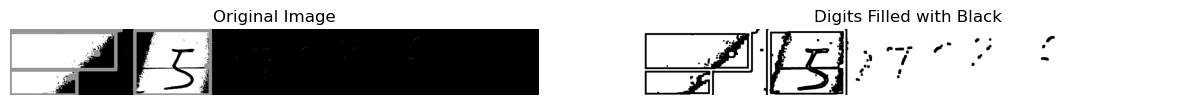

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image
input_image_path = "improved_image.png"  # Replace with your image path
output_image_path = "detected_digits_fixed.png"  # Path to save the result
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Adaptive thresholding to segment digits
binary_image = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Step 2: Invert the binary image (to make digits white)
inverted_image = cv2.bitwise_not(binary_image)

# Step 3: Apply morphological dilation to thicken and fill digits
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))  # Define the kernel size
dilated_image = cv2.dilate(inverted_image, kernel, iterations=2)  # Adjust iterations as needed

# Step 4: Invert back to make digits black
black_filled_digits = cv2.bitwise_not(dilated_image)

# Save and display the final image
cv2.imwrite(output_image_path, black_filled_digits)
print(f"Black filled digits image saved to {output_image_path}")

# Display the images
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Digits Filled with Black")
plt.imshow(black_filled_digits, cmap="gray")
plt.axis("off")

plt.show()

# ???

Image with detected digits saved to output_detected_digits.png


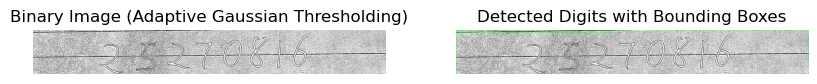

In [12]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread("reduced_height_image.png", cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Step 2: Apply Adaptive Gaussian Thresholding
binary_image = cv2.adaptiveThreshold(
    image,                # Input grayscale image
    255,                  # Maximum pixel value
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # Adaptive method: Gaussian-weighted sum
    cv2.THRESH_BINARY,    # Threshold type: Binary threshold
    11,                   # Block size: Size of neighborhood (must be odd)
    2                     # Constant subtracted from the mean
)

# Step 3: Find contours to detect digits
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 4: Draw bounding boxes around detected digits
annotated_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for visualization
min_contour_area = 100  # Minimum contour area to filter small noise

for contour in contours:
    if cv2.contourArea(contour) >= min_contour_area:
        x, y, w, h = cv2.boundingRect(contour)  # Get bounding box coordinates
        cv2.rectangle(annotated_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box

# Step 5: Save and display the image with detected digits
output_image_path = "output_detected_digits.png"
cv2.imwrite(output_image_path, annotated_image)
print(f"Image with detected digits saved to {output_image_path}")

# Display the results using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Binary Image (Adaptive Gaussian Thresholding)")
plt.imshow(binary_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Detected Digits with Bounding Boxes")
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


# video file

In [36]:
import cv2
import os

# Path to the video file
video_path = "015.avi"  # Replace with the correct path
output_folder = "video_frames"  # Folder to save frames

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Save frame as an image
    frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.png")
    cv2.imwrite(frame_filename, frame)
    print(f"Saved: {frame_filename}")
    
    frame_count += 1

cap.release()
print(f"Extracted {frame_count} frames to {output_folder}.")


Saved: video_frames/frame_0000.png
Saved: video_frames/frame_0001.png
Saved: video_frames/frame_0002.png
Saved: video_frames/frame_0003.png
Saved: video_frames/frame_0004.png
Saved: video_frames/frame_0005.png
Saved: video_frames/frame_0006.png
Saved: video_frames/frame_0007.png
Saved: video_frames/frame_0008.png
Saved: video_frames/frame_0009.png
Saved: video_frames/frame_0010.png
Saved: video_frames/frame_0011.png
Saved: video_frames/frame_0012.png
Saved: video_frames/frame_0013.png
Saved: video_frames/frame_0014.png
Saved: video_frames/frame_0015.png
Saved: video_frames/frame_0016.png
Saved: video_frames/frame_0017.png
Saved: video_frames/frame_0018.png
Saved: video_frames/frame_0019.png
Saved: video_frames/frame_0020.png
Saved: video_frames/frame_0021.png
Saved: video_frames/frame_0022.png
Saved: video_frames/frame_0023.png
Saved: video_frames/frame_0024.png
Saved: video_frames/frame_0025.png
Saved: video_frames/frame_0026.png
Saved: video_frames/frame_0027.png
Saved: video_frames/

Saved: video_frames/frame_0250.png
Saved: video_frames/frame_0251.png
Saved: video_frames/frame_0252.png
Saved: video_frames/frame_0253.png
Saved: video_frames/frame_0254.png
Saved: video_frames/frame_0255.png
Saved: video_frames/frame_0256.png
Saved: video_frames/frame_0257.png
Saved: video_frames/frame_0258.png
Saved: video_frames/frame_0259.png
Extracted 260 frames to video_frames.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Processed 2 frames out of 260 total frames.


In [ ]:
import cv2
import os

# Path to the folder containing extracted frames
output_folder = "video_frames"  # Folder containing frames
last_frame_path = os.path.join(output_folder, "frame_0259.png")  # Last frame to check

# Check if the frame exists
if os.path.exists(last_frame_path):
    # Load and display the last frame
    last_frame = cv2.imread(last_frame_path)
    if last_frame is not None:
        print(f"Last frame found: {last_frame_path}")
        print(f"Frame dimensions: {last_frame.shape}")
        cv2.imshow("Last Frame", last_frame)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Last frame could not be loaded.")
else:
    print(f"Frame not found: {last_frame_path}")


In [5]:
import cv2
import os
import numpy as np

# Path to the video file
video_path = "015.avi"  # Replace with the correct path

# Sliding window parameters
window_size = 5  # Number of frames in each window
step_size = 30     # Step size to slide the window
output_folder = "video_sliding_window_frames"  # Folder to save results

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frame rate
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Frame width
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Frame height

print(f"Video details: {frame_count} frames, {fps} fps, {frame_width}x{frame_height}")

# Sliding window loop
frame_idx = 0
sliding_idx = 0

while True:
    frames = []
    for i in range(window_size):
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    if len(frames) < window_size:
        break

    # Save or process the frames in the current sliding window
    window_output_path = os.path.join(output_folder, f"window_{sliding_idx:04d}.png")
    combined_frame = np.hstack(frames[:5]) if len(frames) >= 5 else np.hstack(frames)
    cv2.imwrite(window_output_path, combined_frame)
    print(f"Saved sliding window: {window_output_path}")

    # Skip step_size frames to slide the window
    for _ in range(step_size):
        ret, _ = cap.read()
        if not ret:
            break

    sliding_idx += 1

cap.release()
print(f"Sliding window processing complete. Processed {sliding_idx} windows.")


Video details: 260 frames, 25 fps, 640x368
Saved sliding window: video_sliding_window_frames/window_0000.png
Saved sliding window: video_sliding_window_frames/window_0001.png
Saved sliding window: video_sliding_window_frames/window_0002.png
Saved sliding window: video_sliding_window_frames/window_0003.png
Saved sliding window: video_sliding_window_frames/window_0004.png
Saved sliding window: video_sliding_window_frames/window_0005.png
Saved sliding window: video_sliding_window_frames/window_0006.png
Saved sliding window: video_sliding_window_frames/window_0007.png
Sliding window processing complete. Processed 8 windows.


In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf

# Load the pre-trained MNIST model
model_path = "my_mnist_model.h5"  # Replace with your trained model path
model = tf.keras.models.load_model(model_path)

# Path to the video file
video_path = "015.avi"  # Replace with your video path
output_folder = "sliding_window_digits"  # Folder to save annotated frames
os.makedirs(output_folder, exist_ok=True)

# Sliding window parameters
window_size = 10  # Number of frames to process in each window
step_size = 5    # Number of frames to skip for the next window

# Open the video
cap = cv2.VideoCapture(video_path)
frame_idx = 0
window_idx = 0


# Adding padding around each frame's output
def add_padding_to_frame(frame, padding_color=(255, 255, 255), padding_size=50):
    """
    Adds a uniform padding around the frame with a specified color and size.
    
    Args:
    - frame (numpy array): The frame to which padding will be added.
    - padding_color (tuple): RGB color of the padding. Default is white.
    - padding_size (int): Width of the padding in pixels. Default is 10.

    Returns:
    - padded_frame (numpy array): The frame with added padding.
    """
    # Convert the frame to RGB if it's grayscale (for uniform padding color application)
    if len(frame.shape) == 2:  # Grayscale frame
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)

    # Add padding around the frame
    padded_frame = cv2.copyMakeBorder(
        frame,
        top=padding_size,
        bottom=padding_size,
        left=padding_size,
        right=padding_size,
        borderType=cv2.BORDER_CONSTANT,
        value=padding_color,  # Color of the padding
    )
    return padded_frame
# Function to preprocess and predict digits in a frame
def predict_digits_in_frame(frame, frame_index):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, binary_frame = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours (potential digit regions)
    contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    annotated_frame = frame.copy()

    height, width = binary_frame.shape
    padding = 5
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 10:  # Filter out small contours (noise)
            # Add padding around the bounding box
            x_padded = max(0, x - padding)
            y_padded = max(0, y - padding)
            w_padded = min(width, x + w + padding) - x_padded
            h_padded = min(height, y + h + padding) - y_padded

            # Crop the digit with padding
            digit_roi = binary_frame[y_padded:y_padded + h_padded, x_padded:x_padded + w_padded]
            resized_digit = cv2.resize(digit_roi, (28, 28)) / 255.0  # Normalize
            resized_digit = np.expand_dims(resized_digit, axis=(0, -1))  # Add batch and channel dimensions

            # Predict the digit
            prediction = model.predict(resized_digit)
            predicted_digit = np.argmax(prediction)

            # Annotate the frame with the predicted digit
            cv2.rectangle(annotated_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(annotated_frame, str(predicted_digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            # Save the cropped digit (optional)
            cropped_path = f"{output_folder}/frame_{frame_index:04d}_digit_{i}_predicted_{predicted_digit}.png"
            cv2.imwrite(cropped_path, digit_roi)

    return annotated_frame

# Sliding window loop
while True:
    frames = []
    for i in range(window_size):
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    if len(frames) < window_size:
        break

    # Process each frame in the current sliding window
    for i, frame in enumerate(frames):
        annotated_frame = predict_digits_in_frame(frame, frame_idx)
        padded_frame = add_padding_to_frame(annotated_frame, padding_color=(255, 255, 255), padding_size=50)

        output_path = os.path.join(output_folder, f"window_{window_idx:04d}_frame_{frame_idx:04d}.png")
        cv2.imwrite(output_path, annotated_frame)
        frame_idx += 1

    # Slide the window by step_size frames
    for _ in range(step_size):
        ret, _ = cap.read()
        if not ret:
            break

    window_idx += 1

cap.release()
print(f"Sliding window digit detection completed. Annotated frames saved in {output_folder}.")


2024-12-04 20:55:01.392940: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

In [ ]:
import cv2
import os

# Display saved frames from the output folder
for frame_file in sorted(os.listdir(output_folder)):
    frame_path = os.path.join(output_folder, frame_file)
    frame = cv2.imread(frame_path)
    cv2.imshow("Annotated Frame", frame)
    cv2.waitKey(500)  # Display for 500ms
cv2.destroyAllWindows()
